# Capstone Project


**Author**: KrishnaKumar Raghunathan ( krshnkmr@gmail.com)

**GitRepo**: https://github.com/krishnakumarraghu/Capstone-SBPRS.git

**HerokuSite**: https://sbprs-capstone-krishnakumarrag.herokuapp.com/

## Sentiment Based Product Recommendation System


#### Problem Statement:
Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

#### Approach:

In order to do this, we plan to build a sentiment-based product recommendation system, which includes the following key steps.

* Step 1 : Data sourcing and sentiment analysis
* Step 2 : Building a recommendation system
* Step 3 : Improving the recommendations using the sentiment analysis model
* Step 4 : Deploying the end-to-end project with a user interface

Following are the details of tasks to be performed Under Step 1:   

 1.  Exploratory data analysis
 2.  Data cleaning
 3.  Text preprocessing
 4.  Feature extraction - Extract features from the text data, we have an option to choose from any of the methods, including bag-of-words, TF-IDF vectorization or w
  
  -----
  Our choice here would be to use ***TF-IDF vectorization*** 

  -----
 5.  Training a text classification model - At least three out of the following four models need to be built (Post handling  class imbalance and perform hyperparameter tuning). 
 * Logistic regression
 * Random forest
 * XGBoost
 * Naive Bayes

  -----
  Our choice here would be to build ***Logistic Regression***, ***Naive Bayes(Multinomial)*** and  ***Random Forest*** models. 
  We will then select the best performing models among these based on ***F1-Score***. This best sentiment model will then be used for product recommendation.

  Rationale :  **F1-Score** in the current context gives the balanced score. 
  (i.e), we would like to take a balanced approach between **Precision**("number of correct recommendations divided by total number of recommendations) and **Recall**("number of correct recommendations divided by the number of recommendations that should have been returned") as this can translate to better conversion rates for our e-commerce company.

  -----

Following are the details of tasks to be performed Under Step 2 & Step 3: 

Build the following Recommendation Systems
 
1. User-based recommendation system
2. Item-based recommendation system

We will analyse the recommendation systems and select the one that is best suited in this case. 

Once we get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings.

Post this , we will  filter out the 5 best products based on the sentiments of the 20 recommended product reviews. 


We will build a web application using Flask framework,To make the web application public, we'll use Heroku.

The following features will be provisioned on the user interface.

* TextBox to Take any of the existing usernames as input.
* A submit button to submit the username.
* Once you press the submit button, it will recommend 5 products   based on the entered username.

## Pre-Requisites

In [1]:
# Skip below step, if not connecting to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Setup BaseDirectory for your Project - We'll download the Data files into this folder
BASE_DIR = "/Users/k0r05mk/Capstone/Capstone-SBPRS"
#Setup ModelDirectory for your Project - We'll Pickle all of the Models, Dataframes, Matrices here.
MODEL_DIR = "/Users/k0r05mk/Capstone/Capstone-SBPRS/models/"

## Step 0: Downloads

In [3]:
#Download Product Reviews Dataset
!wget https://cdn.upgrad.com/uploads/production/c2504c0d-6080-4e1e-8d4c-852b3e68a0ed/sample30.csv -P $BASE_DIR

--2022-03-16 12:10:13--  https://cdn.upgrad.com/uploads/production/c2504c0d-6080-4e1e-8d4c-852b3e68a0ed/sample30.csv
Resolving cdn.upgrad.com (cdn.upgrad.com)... 13.33.171.120, 13.33.171.61, 13.33.171.101, ...
Connecting to cdn.upgrad.com (cdn.upgrad.com)|13.33.171.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18680124 (18M) [application/octet-stream]
Saving to: ‘/Users/k0r05mk/Capstone/Capstone-SBPRS/sample30.csv’

sample30.csv        100%[===================>]  17.81M  3.60MB/s    in 5.6s    

2022-03-16 12:10:20 (3.20 MB/s) - ‘/Users/k0r05mk/Capstone/Capstone-SBPRS/sample30.csv’ saved [18680124/18680124]



In [4]:
# Preview file to verify Delimiters and Presence of Headers (If any)
!head $BASE_DIR/sample30.csv

In [5]:
# Preview file to verify Delimiters and Presence of Trailers (If any)
!tail $BASE_DIR/sample30.csv

In [6]:
#Download Product Reviews Dataset- Attribute Description file
!wget https://cdn.upgrad.com/uploads/production/a2446a81-154b-49cf-8fb2-2e87614496e6/Data+Attribute+Description.csv -P $BASE_DIR

--2022-03-16 12:10:20--  https://cdn.upgrad.com/uploads/production/a2446a81-154b-49cf-8fb2-2e87614496e6/Data+Attribute+Description.csv
Resolving cdn.upgrad.com (cdn.upgrad.com)... 13.33.171.120, 13.33.171.61, 13.33.171.101, ...
Connecting to cdn.upgrad.com (cdn.upgrad.com)|13.33.171.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1298 (1.3K) [application/octet-stream]
Saving to: ‘/Users/k0r05mk/Capstone/Capstone-SBPRS/Data+Attribute+Description.csv’

Data+Attribute+Desc 100%[===================>]   1.27K  --.-KB/s    in 0s      

2022-03-16 12:10:21 (248 MB/s) - ‘/Users/k0r05mk/Capstone/Capstone-SBPRS/Data+Attribute+Description.csv’ saved [1298/1298]



In [7]:
# Preview file to verify Delimiters and Presence of Headers (If any)
!head $BASE_DIR/Data+Attribute+Description.csv

## Step 1 : Data sourcing and sentiment analysis

### Reading and Understanding the Data

#### Import Libraries

In [8]:
# Import Necessary Libraries
import pandas as pd
from dateutil import parser
import numpy as np
import pprint as pp
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import time
import pickle
import string
import re
from collections import Counter
# Set Jupyter Inline plot generation settings
%matplotlib inline
# Set Seaborn specific Configuration
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":12,"axes.labelsize":8})

# Scipy for stats
from scipy import stats
from scipy.stats import norm

#Compress Pickle for saving to disk
import compress_pickle as cp

#Sklearn Libraries for Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

# NLTK libraries for Text Pre-Processing
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

# Switching off warnings
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/k0r05mk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/k0r05mk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/k0r05mk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/k0r05mk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Read and display dataset summary

In [9]:
#  Read Product Dataset
dset_path = BASE_DIR + '/sample30.csv'
base_df = pd.read_csv(dset_path)

In [10]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [11]:
# Read Product Description 
desc_dset_path = BASE_DIR + '/Data+Attribute+Description.csv'
desc_df = pd.read_csv(desc_dset_path,encoding='ISO-8859-1')

In [12]:
pd.set_option('display.max_colwidth', -1)
desc_df
dfStyler = desc_df.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

In [13]:
# Review the statistics
base_df.describe().T

count      mean       std  min  25%  50%  75%  max
reviews_rating  30000.0  4.483133  0.988441  1.0  4.0  5.0  5.0  5.0

In [14]:
base_df.shape

(30000, 15)

#### Observing `reviews_date` 

reviews_date happens to be read as 'Object'. This could have been because of multiple datatypes detected in the Column. 
On further investigation, apart from NaN's, we do find that there are few entries that are not date or datetime. 

From the Problem Statement , we don't see any business impact of using this column for our Sentiment analysis. 
But, we'll try to fix this Column later during EDA (If Necessary) to further our Insights.

In [15]:
#Display the Records with Discrepency
for rec in base_df['reviews_date'][28420:28435]:
  print(rec)

2016-09-03T00:00:00.000Z
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
 hooks slide or swivel into any desired position."
2016-03-11T03:38:34.000Z
2014-12-02T00:00:00.000Z
2014-08-14T00:00:00Z
2013-02-22T00:00:00Z
2014-02-24T00:00:00Z
2014-04-21T00:00:00Z


#### Observing `user_sentiment` & `reviews_rating`

**user_sentiment** - holds the Overall Sentiment (From Data Dictionary). This is a Key column for our Sentiment analysis and subsequent Model building. 

**reviews_rating** - holds the ratings shared by the user. This is the number shared by the end-user for the item. This is a number between 1 - 5 (1 - Being Lowest & 5 - Being Highest )

It will be helpful to validate the Relationship between `reviews_rating` and `user_sentiment`.  We anticipate the relation to be Positively correlated.

We'll further need to explore as the data shared doesn't really correlate with our understanding (Though there is a Positive correlation from 1 to 5, the proportions seem odd)
(i.e) We do see positive sentiment (> 50%) for low rating such as 1 and Negative ratings for high rating such as 5.

In [16]:
#Review reviews_ratings vs user_sentiment
_df = base_df[['reviews_rating','user_sentiment']].groupby(['reviews_rating','user_sentiment']).agg({'user_sentiment':'count'}).groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
_df.unstack()

user_sentiment           
user_sentiment       Negative   Positive
reviews_rating                          
1               43.135838      56.864162
2               33.333333      66.666667
3               16.356877      83.643123
4               9.136213       90.863787
5               8.929429       91.070571

#### Section Summary
We have 30K Rows and 15 Columns as part of the Product review Dataset. reviews_rating is the only Numeric column all others are Object types.

### Exploratory Data Analysis (EDA)



#### **Data Quality Checks**

Given there are 15 columns we will first try to identify the relevant Columns that are suited for proceeding with our EDA. 

Key Goals of the Exercise would be to : 

1. Identify/Shortlist Columns with Null or Missing Values and decide approach for Null Imputation.
2. Identify/Shortlist Columns with Single Unique Values which don't add any value to EDA to be removed.
3. Identify/Shortlist duplicated Columns to be removed.
4. Identify/Shortlist Columns with no business significaiton to be dropped.




In [17]:
# Checking for No.of.NA's across all of the Columns
# Helper function to obtain "NA's"
def fngetNullspc(_df):
  _d = {}
  for col in _df.columns:
    _d[col] = round((_df[col].isnull().sum()/_df.shape[0])*100,2)
  return list(_d.values())

def fngetUniqpc(_df):
  _d = {}
  for col in _df.columns:
    _d[col] = round((_df[col].nunique()/_df.shape[0])*100,2)
  return list(_d.values())

# Define a function to study the Product Dataset
def previewdataset(df):
    """
    Preview data and summary statistics for the Dataset to be subjected for EDA
    
    Parameters
    ----------
    - df dataframe

    Returns
    ---------
    
    A Dataframe containing Summary Statistics.
    """
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['%Missing'] = fngetNullspc(df)
    summary['Uniques'] = df.nunique().values
    summary['%Uniques'] = fngetUniqpc(df)
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [18]:
#Preview the Product Dataset
edadf = previewdataset(base_df)

Dataset Shape: (30000, 15)


In [19]:
# Preview the dataframe Statistics
edadf

Name  dtypes  Missing  %Missing  Uniques  %Uniques  \
0   id                    object  0        0.00      271      0.90       
1   brand                 object  0        0.00      214      0.71       
2   categories            object  0        0.00      270      0.90       
3   manufacturer          object  141      0.47      227      0.76       
4   name                  object  0        0.00      271      0.90       
5   reviews_date          object  46       0.15      6857     22.86      
6   reviews_didPurchase   object  14068    46.89     2        0.01       
7   reviews_doRecommend   object  2570     8.57      2        0.01       
8   reviews_rating        int64   0        0.00      5        0.02       
9   reviews_text          object  0        0.00      27282    90.94      
10  reviews_title         object  190      0.63      18535    61.78      
11  reviews_userCity      object  28071    93.57     977      3.26       
12  reviews_userProvince  object  29830    99.43     42       0.14       
13  reviews_username      object  63       0.21      24914    83.05      
14  user_sentiment        object  1        0.00      2        0.01       

                                                                                                                                                                                                  First Value  \
0   AV13O1A8GV-KLJ3akUyj                                                                                                                                                                                        
1   Universal Music                                                                                                                                                                                             
2   Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap                                              
3   Universal Music Group / Cash Money                                                                                                                                                                          
4   Pink Friday: Roman Reloaded Re-Up (w/dvd)                                                                                                                                                                   
5   2012-11-30T06:21:45.000Z                                                                                                                                                                                    
6   NaN                                                                                                                                                                                                         
7   NaN                                                                                                                                                                                                         
8   5                                                                                                                                                                                                           
9   i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
10  Just Awesome                                                                                                                                                                                                
11  Los Angeles                                                                                                                                                                                                 
12  NaN                                                                                                               

#### Plot - Missing & Uniques

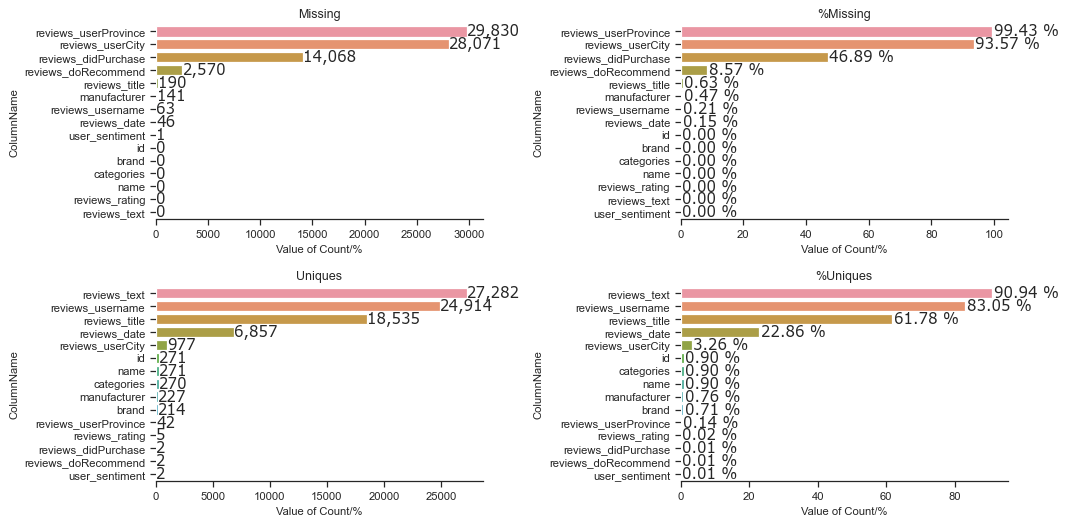

In [20]:
#Building a Visual for Nulls
#Helper function for visualizing the Missing and Uniq Columns stats across columns
def fnbarplot(df,xcol,ycol,ax,fmt='{0:,.0f}'):
  sns.set(font="Verdana",style="white")
  #plt.figure(figsize=(15,8))
  sns.barplot(y=ycol, x=xcol,data=df.sort_values(xcol,ascending=False),orient="h",ax=ax)
  ax.set_ylabel('ColumnName',fontsize=9)
  ax.set_title(xcol,fontsize=10)
  ax.set_xlabel("Value of Count/%",fontsize=9)
  ax.tick_params(labelsize=9)
  #ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
  
  # label each bar in barplot
  for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width
    # adding text to each bar
    ax.text(x = width+0.5, # x-coordinate position of data label, padded 0.5 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = fmt.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

#Define Columns to visualize & their formats
edadf_cols = ['Missing', '%Missing', 'Uniques', '%Uniques']
edadf_fmt = ['{0:,.0f}','{0:,.2f} %','{0:,.0f}','{0:,.2f} %']

plotsize = (2,2)
fig, ax = plt.subplots(nrows=plotsize[0],ncols=plotsize[1],figsize=(12,6),dpi=90)
plotcatlist = zip(edadf_cols,[ (i,j) for i in range(0,plotsize[0]) for j in range(0,plotsize[1])],edadf_fmt)

for item in plotcatlist:
  r = item[1][0]
  c = item[1][1]
  fnbarplot(edadf,item[0],'Name',ax[r,c],item[2])
  
plt.legend([],[], frameon=False)
plt.tight_layout()
sns.despine(left=True)
plt.show()

In [21]:
# --------------------
# 1. Identify/Shortlist Columns with Null Values
print("Columns with Missing or Null Values: ",edadf[edadf['Missing'] > 0].shape[0])
print("--")
# --------------------
# 2. Identify/Shortlist Columns with Single Unique Values
print(f'Columns with Single Unique Value (Names): { edadf[(edadf["Uniques"]/len(base_df) * 100) == 100].Name.values },"Total No. of Columns": {edadf[(edadf["Uniques"]/len(base_df) * 100) == 100].shape[0]}')
print("--")
# --------------------
# 3. Check if any of the columns have duplicate Names
print("Check for Columns with Duplicate Names " , base_df.columns.duplicated().sum())
print("--")
# --------------------
# 4. Selecting duplicate rows except first occurrence based on all columns
print("Check for Row Duplicates :" ,base_df[base_df.duplicated()].shape[0])
print("--")

Columns with Missing or Null Values:  9
--
Columns with Single Unique Value (Names): [],"Total No. of Columns": 0
--
Check for Columns with Duplicate Names  0
--
Check for Row Duplicates : 0
--


**Observations**
* 9 Columns have Null or Missing values.
* 3 Columns have Null % > 45% with reviews_userProvince, reviews_userCity having more than 92% Nulls.  
* No Column Duplicates or Row Duplicates are to be found
* No Column is found to have a Single Unique value


In [22]:
#Customized from https://stackoverflow.com/a/48372659 and Other labeling Solutions
def fnautolabelbar(ax,orient='h',fmt='{0:,.0f}',rotation=0):    
  """
    Annotate a Normal BarChart (for a given Orientation) with format specification
    
    Parameters
    ----------
    - ax is the axis the plot is currently being plotted against.
    - orient orientation of the plotype ; possible values are 'h','v'. Use 'h' for horizontal bar-plots & 'v' for vertical bar-plots. 'v' is by default
    - fmt is the formatSpecifier for the value to be labelled.
    
    Returns
    ---------
    
    None

  """
  # Number of points between bar and label.
  space = 9
  # Vertical alignment for positive values
  valign = 'bottom'
  # Horizontal alignment for positive values
  halign = 'left'

  if orient == 'v':
    for p in ax.patches:
      # If value of bar is negative: Place label below bar
      if p.get_height() < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        valign = 'top'
      ax.annotate(fmt.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = valign, 
                   xytext = (0, space), 
                   textcoords = 'offset points',rotation=rotation,
                   fontsize=9)
  else:
    for p in ax.patches:
      # If value of bar is negative: Place label to the left of the bar
      if p.get_width() < 0:
      # Invert space to place label to the left
        space *= -1
      # Horizontally align label to the left 
        halign = 'right'
      ax.annotate(fmt.format(p.get_width()), 
                   (p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha = halign, va = 'center', 
                   xytext = (space, 0), 
                   textcoords = 'offset points',rotation=rotation,
                   fontsize=9)

#### Plot - user_sentiment

User Sentiment Distribution(By Count) : 0 -> Positive 1 -> Negative
Positive    26632
Negative    3367 
Name: user_sentiment, dtype: int64
--



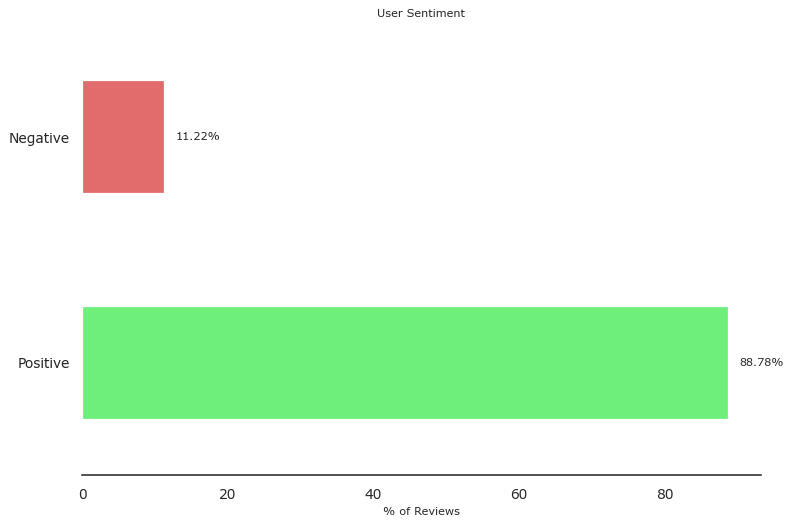

In [23]:
# Variable : user_sentiment (Type: Qualitative)
print('User Sentiment Distribution(By Count) : 0 -> Positive 1 -> Negative')
print(base_df['user_sentiment'].value_counts())
print('--')
print()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
(base_df['user_sentiment'].value_counts(normalize=True)*100).plot.barh(ax=ax,color=colors)
ax.set_title('User Sentiment',fontsize=9)
ax.set_xlabel('% of Reviews',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.2f}%')

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** Class Imbalance is evident with Negative Reviews of just 11.21%. 




#### Plot - reviews_rating

Reviews Rating Distribution(By Count)
5    20831
4    6020 
1    1384 
3    1345 
2    420  
Name: reviews_rating, dtype: int64
--



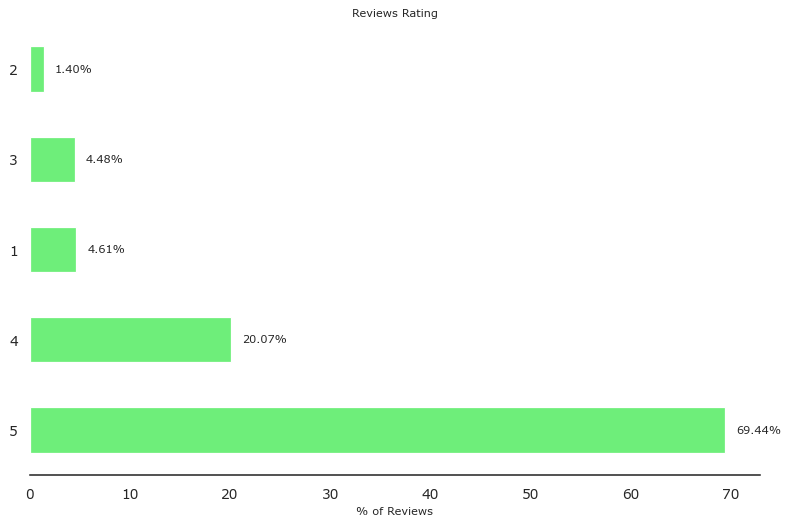

In [24]:
# Variable : reviews_rating (Type: Qualitative)
print('Reviews Rating Distribution(By Count)')
print(base_df['reviews_rating'].value_counts())
print('--')
print()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6), dpi=90)
colors = ['#6EEE7A']
(base_df['reviews_rating'].value_counts(normalize=True)*100).plot.barh(ax=ax,color=colors)
ax.set_title('Reviews Rating',fontsize=9)
ax.set_xlabel('% of Reviews',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.2f}%')

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** This follows our earlier User sentiment observation where the Class Imbalance was evident and skewed towards Positive class. Here, we see reviews for Rating 5 (Highest scale) proportionately higher than Rating 1 (Lowest scale).

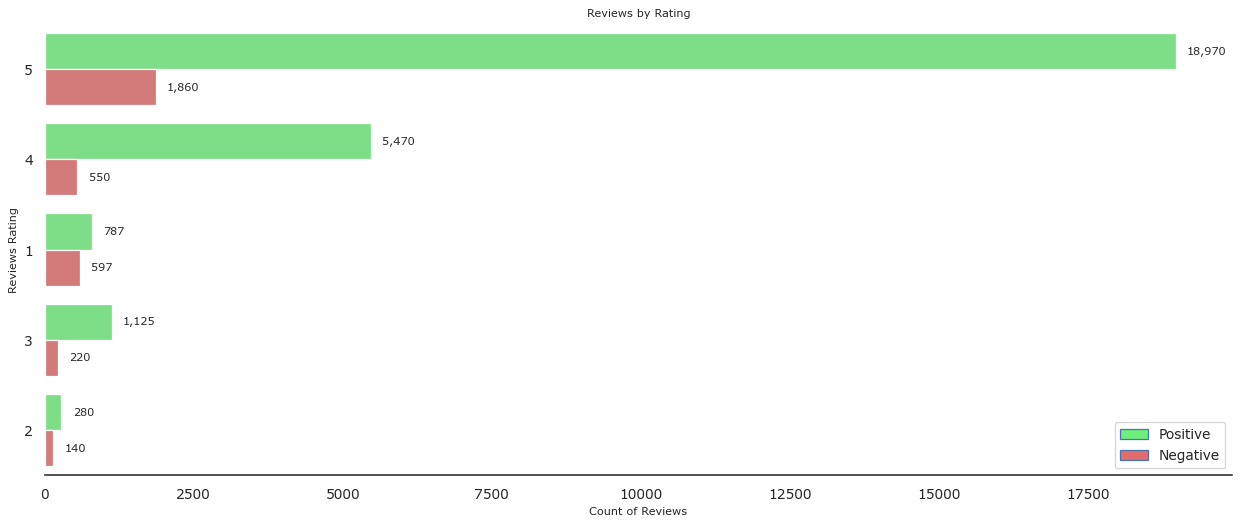

In [25]:
from matplotlib.patches import Patch
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='reviews_rating',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=base_df['reviews_rating'].value_counts().index)
ax.set_title('Reviews by Rating',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Reviews Rating',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

Let's Deep dive more into Negative Sentiment for Rating 5 & Positive Sentiment for  Rating 1. This seems to be counter intuitive as we expect almost 0 - Negative reviews for 5 and 0 - Positive reviews for 1.

In [26]:
rf_1 = base_df[(base_df['reviews_rating'] == 1) & (base_df['user_sentiment'] == 'Positive')]

In [27]:
rf_1.shape

(787, 15)

In [28]:
rf_1[:50][['reviews_rating','user_sentiment','reviews_text','reviews_title']]

reviews_rating user_sentiment  \
9     1               Positive        
11    1               Positive        
14    1               Positive        
54    1               Positive        
56    1               Positive        
58    1               Positive        
60    1               Positive        
688   1               Positive        
689   1               Positive        
690   1               Positive        
692   1               Positive        
693   1               Positive        
694   1               Positive        
696   1               Positive        
698   1               Positive        
700   1               Positive        
701   1               Positive        
702   1               Positive        
703   1               Positive        
706   1               Positive        
708   1               Positive        
709   1               Positive        
711   1               Positive        
712   1               Positive        
714   1               Positive        
716   1               Positive        
717   1               Positive        
718   1               Positive        
719   1               Positive        
720   1               Positive        
723   1               Positive        
725   1               Positive        
728   1               Positive        
729   1               Positive        
730   1               Positive        
733   1               Positive        
737   1               Positive        
1072  1               Positive        
1073  1               Positive        
1074  1               Positive        
1077  1               Positive        
1078  1               Positive        
1225  1               Positive        
1263  1               Positive        
1264  1               Positive        
1265  1               Positive        
1266  1               Positive        
1297  1               Positive        
1299  1               Positive        
1300  1               Positive        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   reviews_text  \
9     Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refund                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [29]:
rf_5 = base_df[(base_df['reviews_rating'] == 5) & (base_df['user_sentiment'] == 'Negative')]

In [30]:
rf_5.shape

(1860, 15)

In [31]:
rf_5[['reviews_rating','user_sentiment','reviews_text','reviews_title']][:50]

reviews_rating user_sentiment  \
211  5               Negative        
213  5               Negative        
215  5               Negative        
216  5               Negative        
217  5               Negative        
220  5               Negative        
235  5               Negative        
237  5               Negative        
246  5               Negative        
266  5               Negative        
271  5               Negative        
273  5               Negative        
284  5               Negative        
298  5               Negative        
302  5               Negative        
314  5               Negative        
317  5               Negative        
319  5               Negative        
325  5               Negative        
330  5               Negative        
335  5               Negative        
349  5               Negative        
360  5               Negative        
370  5               Negative        
382  5               Negative        
384  5               Negative        
398  5               Negative        
403  5               Negative        
431  5               Negative        
478  5               Negative        
509  5               Negative        
513  5               Negative        
540  5               Negative        
542  5               Negative        
549  5               Negative        
553  5               Negative        
557  5               Negative        
579  5               Negative        
583  5               Negative        
600  5               Negative        
615  5               Negative        
616  5               Negative        
647  5               Negative        
658  5               Negative        
671  5               Negative        
673  5               Negative        
814  5               Negative        
816  5               Negative        
819  5               Negative        
820  5               Negative        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   reviews_text  \
211  this product makes my face feel like I have de-aged by twenty years! This review was collected as part of a promotion.                                                                                                                                                                                                                                                                                                                                                                                                                                                       
213  After using a short time it totally changed the texture of my skin. This review was collected as part of a promotion.                                                                                                                                                                                                                                                                                                                                                                                                                                                        
215  I like the feel and texture of my skin after using this product. This review was collected as part of a promotion.                                                                                                                                                                                                                                                                  

**Observation** 
We can see obvious mis-classification for Positive and Negative Sentiment tags when the actual content in both `reviews_text` and `reviews_title` indicate they are otherwise. With this kind of dataset, we anticipate lower accuracy, precision and recall metrics from our Classification Model. 

We decide to keep this untouched and revisit if the Model performance detoriates.

Convert `reviews_date` to datetime . This is purely for EDA purpose where we'll try unwrap any trends in rating in the dataset.

In [32]:
#We see that some the reviews_date columns are Nan. We'll set them to Default '1/1/1900'
base_df['reviews_date'].fillna(value='1900-01-01T00:00:00.000000Z', inplace=True)

#We also had String values in the column, we'll Default then as for Nulls.
base_df['reviews_date'] = base_df['reviews_date'].apply(lambda x : x if str(x)[:4].isdigit() else '1900-01-01T00:00:00.000000Z')

#Build a Lamba to parse the Date Column to datetime
lfn_date_parser = lambda x : parser.isoparse(str(x)[:-1])

# Apply Correction
base_df['reviews_date'] = base_df['reviews_date'].apply(lfn_date_parser)

#### Plot - reviews_year

In [33]:
#Get `reviews_year` from `reviews_date`
base_df['reviews_year'] = base_df['reviews_date'].apply(lambda x: x.year)

In [34]:
# Variable : reviews_year (Type: Qualitative)
print('Reviews Distribution by Year(%)')
print(base_df['reviews_year'].value_counts(normalize=True) * 100)
print('--')
print()

Reviews Distribution by Year(%)
2014    27.923333
2015    21.526667
2016    16.520000
2012    14.366667
2017    10.513333
2013    4.446667 
2009    1.623333 
2011    1.513333 
2010    1.270000 
1900    0.180000 
2008    0.073333 
2007    0.033333 
2018    0.010000 
Name: reviews_year, dtype: float64
--



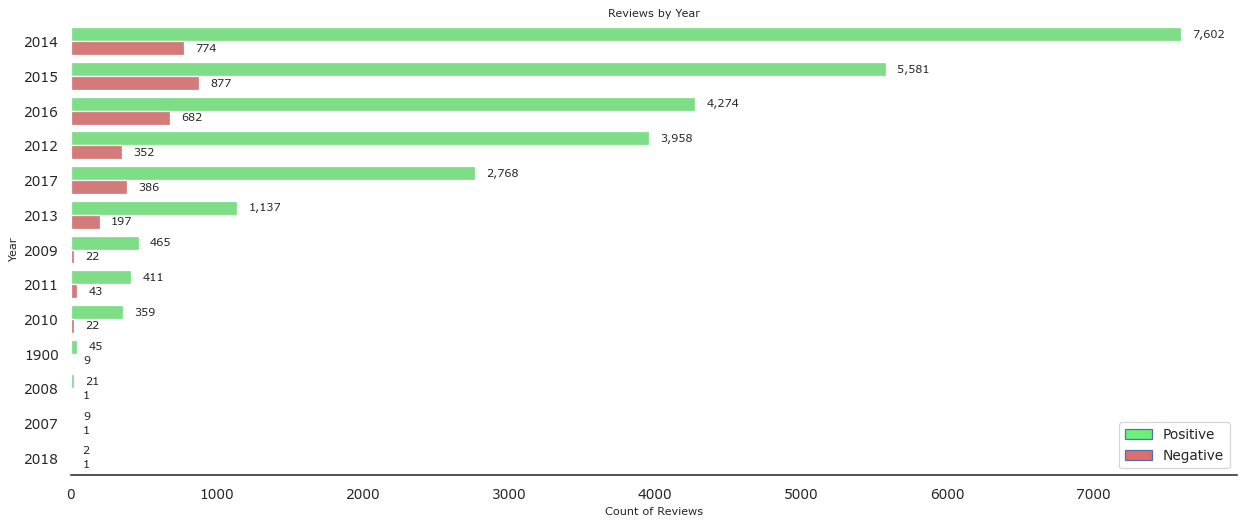

In [35]:
from matplotlib.patches import Patch
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='reviews_year',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=base_df['reviews_year'].value_counts().index)
ax.set_title('Reviews by Year',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Year',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** The Dataset has most of the reviews from Year 2014 followed by 2015 and 2016. We Could see similar skewed distribution found on the Overall dataset, to be repeating within each Year. 

#### Plot - reviews_month

In [36]:
#Get `reviews_month` from `reviews_date`
#Define Month Dict
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
base_df['reviews_month'] = base_df['reviews_date'].apply(lambda x: monthDict.get(x.month))

#Convert to Category
base_df['reviews_month']=base_df['reviews_month'].astype('category')

In [37]:
# Variable : reviews_year (Type: Qualitative)
base_df['reviews_month'].value_counts(normalize=True) * 100

Jan    25.026667
Dec    19.816667
Feb    9.996667 
Oct    6.620000 
Nov    6.410000 
Sep    6.150000 
Mar    4.993333 
Aug    4.603333 
May    4.390000 
Apr    4.300000 
Jun    4.046667 
Jul    3.646667 
Name: reviews_month, dtype: float64

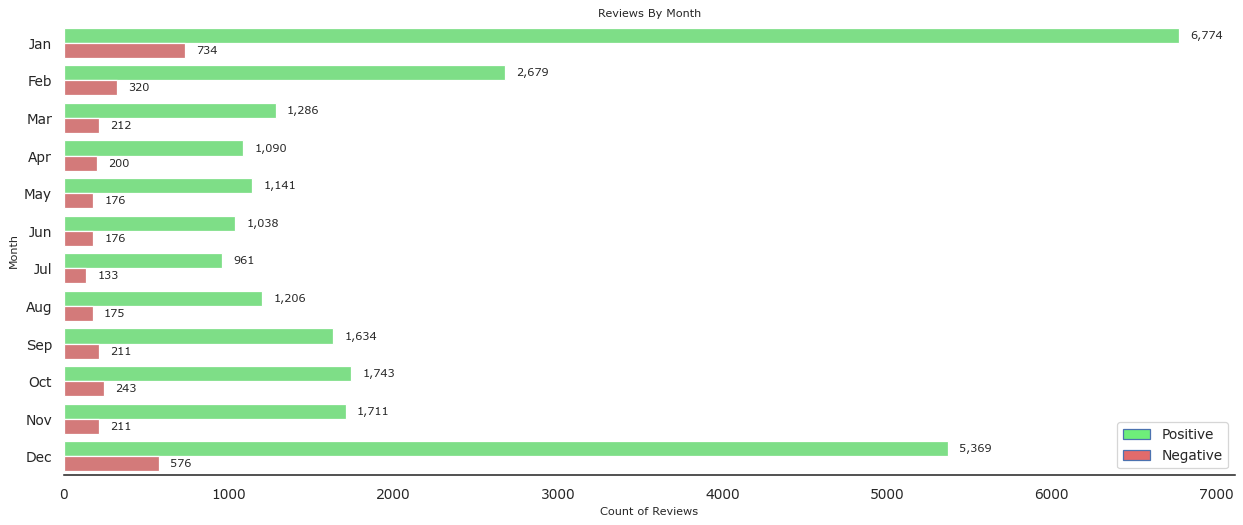

In [38]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='reviews_month',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=monthDict.values())
ax.set_title('Reviews By Month',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Month',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** The Dataset has most of the reviews from Jan and Dec. This could be because of the Holiday season and people buy gifts and share more reviews. The Skewed distribution still exists for Positive and Negative user sentiments.

#### Plot - categories

`categories` has multiple categories for Product classification in the catalogue. There seems to be assorted set of categories. We'll plot for the first category added for the each product. We'll plot the top 10 categories.

In [39]:
base_df['first_category'] = base_df['categories'].apply(lambda x: x.split(',')[0].strip())

In [40]:
base_df['first_category'].value_counts(normalize=True) * 100

Household Essentials        29.926667
Movies                      23.180000
Personal Care               16.620000
Household Chemicals         7.810000 
Movies & TV Shows           5.233333 
Food                        5.196667 
Beauty                      3.966667 
Home                        2.193333 
School & Office Supplies    1.073333 
Office                      1.043333 
Baby                        0.963333 
Food & Beverage             0.803333 
Music on CD or Vinyl        0.680000 
Kitchen & Dining            0.430000 
Home Improvement            0.413333 
Auto & Tires                0.160000 
Furniture                   0.120000 
Featured Brands             0.076667 
Health                      0.043333 
Sports & Outdoors           0.020000 
Clothing                    0.016667 
Holiday Shop                0.013333 
Pro Audio                   0.003333 
Party Supplies              0.003333 
Party & Occasions           0.003333 
Patio & Garden              0.003333 
Gift Finder 

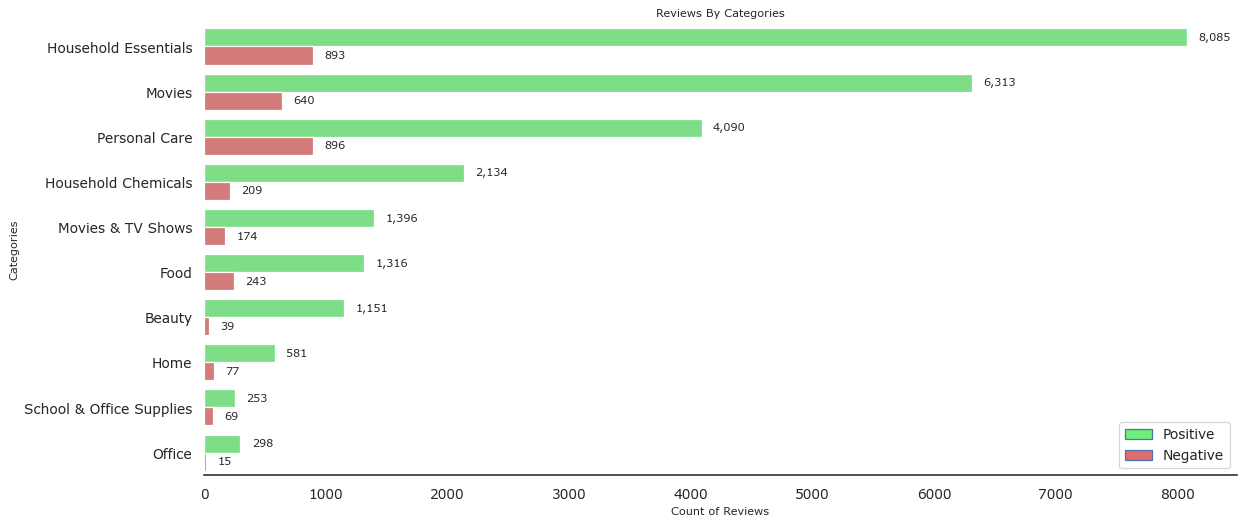

In [41]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='first_category',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=base_df['first_category'].value_counts().index[:10])
ax.set_title('Reviews By Categories',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Categories',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** The Dataset has most of the reviews for Household essentials/Chemicals, Movies and Personal Care Products. The Skewness for Positive and Negative sentiment is visible even within product categories.

#### Plot - brand
`brand` refers to the Name of the brand of the product to which user has given review and rating. We'll plot to see any insights to user_sentiments.
Note: There are more than 200 Products. We'll plot for Top 10 Brands.


In [42]:
base_df['brand'].value_counts(normalize=True) * 100

Clorox                   35.283333
Warner Home Video        11.083333
Disney                   4.000000 
L'oreal Paris            3.953333 
FOX                      2.956667 
                           ...    
Pacific Natural Foods    0.003333 
Noosa                    0.003333 
Southern Enterprises     0.003333 
SLOAN VALVE COMPANY      0.003333 
Universal Music          0.003333 
Name: brand, Length: 214, dtype: float64

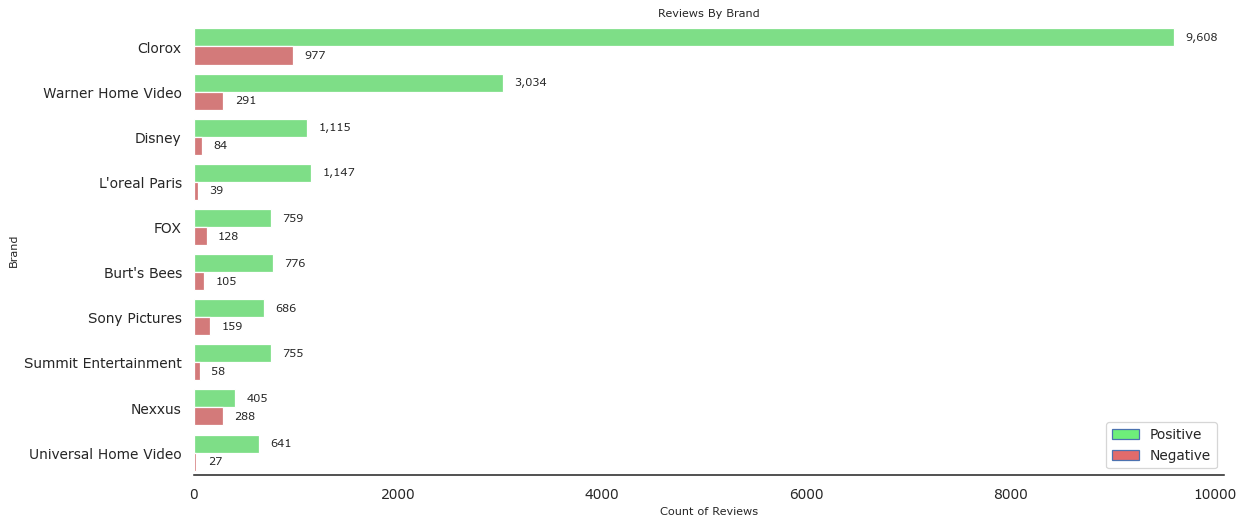

In [43]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='brand',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=base_df['brand'].value_counts().index[:10])
ax.set_title('Reviews By Brand',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Brand',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** The Dataset has most of the reviews Clorex, Disney and Warner Home Video. The Skewness for Positive and Negative sentiment is visible even within brands.

#### Plot - name

`name`
The column represents the Product name. Seems to be 1-1 with `id` Column. This column is of business significance to us , as our final recommendation will propose product names for a given user name.

In [44]:
base_df['name'].value_counts()

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3325
Clorox Disinfecting Bathroom Cleaner                                              2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)               1143
                                                                                  ... 
5302050 15/16 FCT/HOSE ADAPTOR                                                    1   
Clorox Ultimate Care Premium Bleach                                               1   
Pocket Watch Wall Clock Distressed Black - Yosemite Home Decor174                 1   
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct                                    1   
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                         1   
Name: name, Length: 271, dtype: int64

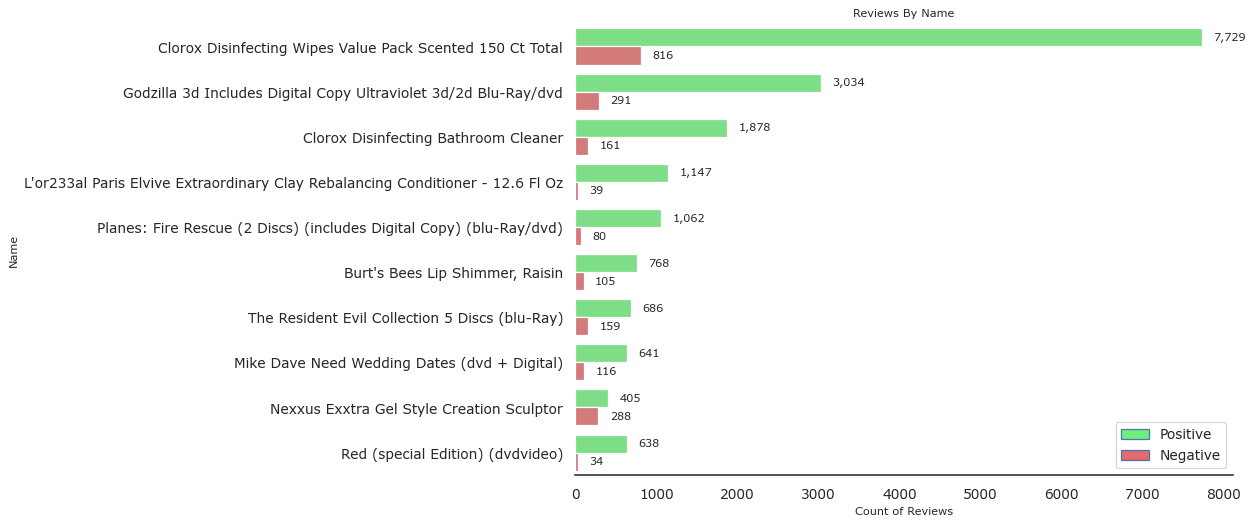

In [45]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='name',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=base_df['name'].value_counts().index[:10])
ax.set_title('Reviews By Name',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Name',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** Just like we saw in the `brands` plot Clorex products are among the top products along with Movies from Disney and Warner Bros, personal care products from L'oreal feature in the top 10. The Skewed distribution for Positive and Negative is consistent within each product a well.

In [46]:
base_df['id'].value_counts(normalize=True) * 100

AVpf3VOfilAPnD_xjpun    28.483333
AVpfPaoqLJeJML435Xk9    11.083333
AVpfJP1C1cnluZ0-e3Xy    6.796667 
AVpfW8y_LJeJML437ySW    3.953333 
AVpfRTh1ilAPnD_xYic2    3.810000 
                          ...    
AVpfP-rELJeJML435jEN    0.003333 
AVpfbpzd1cnluZ0-kqJV    0.003333 
AVpfbjraLJeJML439F91    0.003333 
AVpfa1joLJeJML4385hb    0.003333 
AV13O1A8GV-KLJ3akUyj    0.003333 
Name: id, Length: 271, dtype: float64

As it can be seen, this supposedly Uniquely identifies  review given by the user to a particular product in the dataset.

Every `id` is mapped to a unique product in the dataset. 

In [47]:
base_df[base_df['id'] == 'AVpf3VOfilAPnD_xjpun'].groupby(['name']).count()

id  brand  \
name                                                                     
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545  8545    

                                                           categories  \
name                                                                    
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545         

                                                           manufacturer  \
name                                                                      
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545           

                                                           reviews_date  \
name                                                                      
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545           

                                                           reviews_didPurchase  \
name                                                                             
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  6395                  

                                                           reviews_doRecommend  \
name                                                                             
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8515                  

                                                           reviews_rating  \
name                                                                        
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545             

                                                           reviews_text  \
name                                                                      
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545           

                                                           reviews_title  \
name                                                                       
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8544            

                                                           reviews_userCity  \
name                                                                          
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  931                

                                                           reviews_userProvince  \
name                                                                              
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  13                     

                                                           reviews_username  \
name                                                                          
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8525               

                                                           user_sentiment  \
name                                                                        
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545             

                                                           reviews_year  \
name                                                                      
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545           

                                                           reviews_month  \
name                                                                       
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545            

                                                           first_category  
name                                                                       
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total  8545

If the product is reviewed more than once by the same user, the `id` doesn't change. This indicates duplicate reviews by the same user for the same product. 
The `id` doesn't also change when a same product is reviewed by multiple usernames.

In [48]:
base_df[(base_df['id'] == 'AVpf3VOfilAPnD_xjpun') & (base_df['reviews_username'] =='zxcsdfd') ]

id   brand  \
9141   AVpf3VOfilAPnD_xjpun  Clorox   
12774  AVpf3VOfilAPnD_xjpun  Clorox   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 categories  \
9141   Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners   
12774  Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners   

      manufacturer                                                       name  \
9141   Clorox       Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
12774  Clorox       Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

             reviews_date reviews_didPurchase reviews_doRecommend  \
9141  2014-12-02 00:53:21  NaN                 True                 
12774 2014-12-02 00:00:00  False               True                 

       reviews_rating  \
9141   5                
12774  5                

                                                                                                 reviews_text  \
9141   I really really like clorox wipes they are the best. This review was collected as part of a promotion.   
12774  I really really like clorox wipes they are the best. This review was collected as part of a promotion.   

      reviews_title reviews_userCity reviews_userProvince reviews_username  \
9141   Clorox Wipes  NaN              NaN                  zxcsdfd           
12774  clorox wipes  NaN              NaN                  zxcsdfd           

      user_sentiment  reviews_year reviews_month        first_category  
9141   Positive       2014          Dec           Household Essentials  
12774  Positive       2014          Dec           Household Essentials

In [49]:
base_df[(base_df['id'] == 'AVpf3VOfilAPnD_xjpun')][:4] [['id','name','reviews_username']]

id  \
6479  AVpf3VOfilAPnD_xjpun   
6480  AVpf3VOfilAPnD_xjpun   
6481  AVpf3VOfilAPnD_xjpun   
6482  AVpf3VOfilAPnD_xjpun   

                                                           name  \
6479  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
6480  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
6481  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
6482  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

     reviews_username  
6479  barsea           
6480  sofia50          
6481  renee65          
6482  angi677

**Observation** `id` Column has exact same distribution as that of the Product Name. This can be used a proxy to Product Name.

#### Plot - manufacturer

`manufacturer` Column represents the name of the manufacturer of the product

We Observe that this column has mostly Brand and or/ Product line details. The value counts follow a similar distribution to `name`.

In [50]:
base_df['manufacturer'].value_counts()

Clorox                                8546
Test                                  3325
AmazonUs/CLOO7                        2039
L'oreal Paris                         1232
Walt Disney                           1143
                                      ... 
Pacific Foods of Oregon, Inc.         1   
Unfi                                  1   
Herr's                                1   
Southern Enterprises                  1   
Universal Music Group / Cash Money    1   
Name: manufacturer, Length: 227, dtype: int64

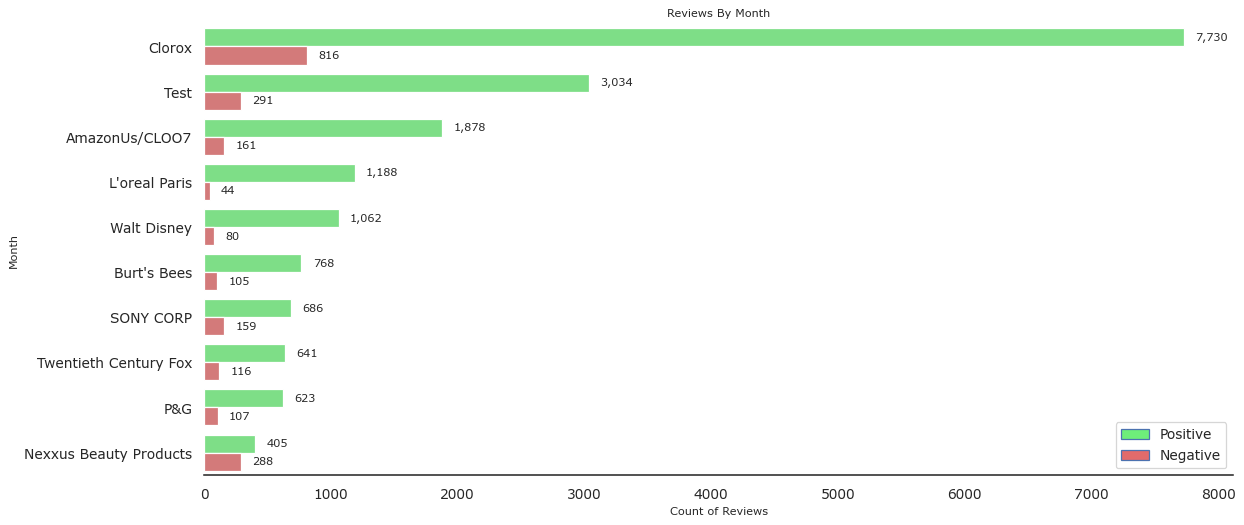

In [51]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.countplot(y='manufacturer',hue='user_sentiment',data=base_df,ax=ax,palette=colors,order=base_df['manufacturer'].value_counts().index[:10])
ax.set_title('Reviews By Month',fontsize=9)
ax.set_xlabel('Count of Reviews',fontsize=9)
ax.set_ylabel('Month',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='lower right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** Just like we saw in the `brands` plot Clorex products are among the top products along with Movies from Disney and Warner Bros, personal care products from L'oreal feature in the top 10. The Skewed distribution for Positive and Negative is consistent within each product a well.

#### Plot - reviews_text (by length)

In [52]:
base_df['review_length'] = base_df['reviews_text'].apply(lambda x : len(x))

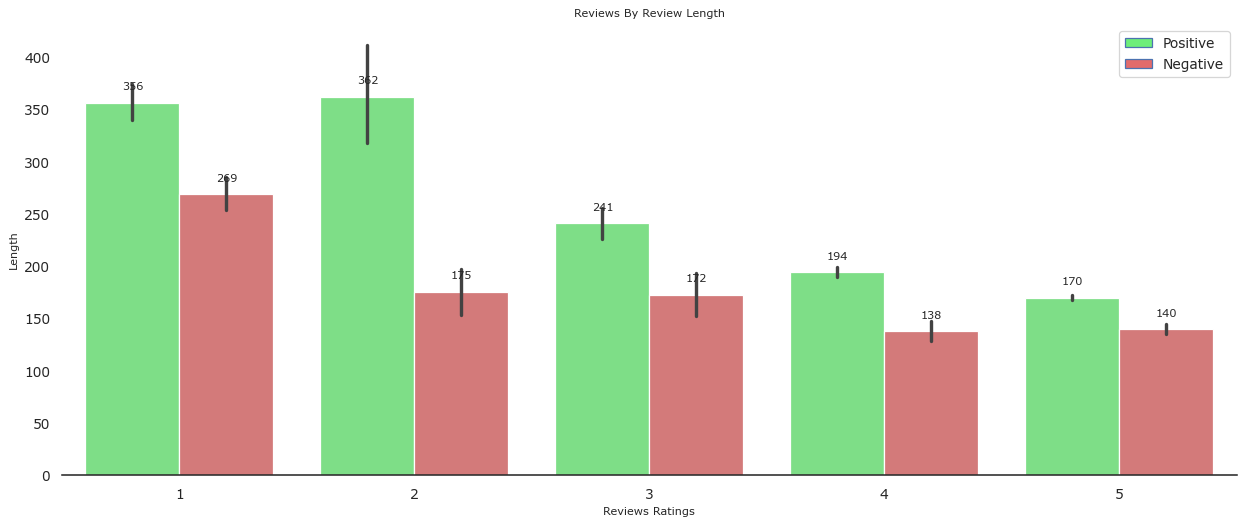

In [53]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6), dpi=90)
colors = ['#6EEE7A','#E26B6B']
ax = sns.barplot(x='reviews_rating',y='review_length',hue='user_sentiment',data=base_df,ax=ax,palette=colors)
ax.set_title('Reviews By Review Length',fontsize=9)
ax.set_xlabel('Reviews Ratings',fontsize=9)
ax.set_ylabel('Length',fontsize=9)
fnautolabelbar(ax,fmt='{0:,.0f}',orient='v')

# Remove legend
# ax.legend([],[], frameon=False)
# Add Custom Legend
legend_elements = [
Patch(facecolor='#6EEE7A', edgecolor='b',
                         label='Positive'),
Patch(facecolor='#E26B6B', edgecolor='b',
                         label='Negative')]

ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** Review length indicates Good reviews (3,4,5 Ratings) are shorter compared to poor reviews (1,2 Ratings). 

The Positive & Negative proportion for Rating 5 seems small and possibly indicates an issue with the sentiment mapping. Same for 1,2 Rating Scales.

### Data Pre-processing

#### Drop Insignificant Columns

In [54]:
# Drop 'reviews_userProvince' & 'reviews_userCity' as they have more than 90% Nulls. They also don't add value to our Sentiment analysis
# Drop 'reviews_date' along with 'reviews_month' &'reviews_year' as there isn't any business significance to Sentiment Analysis
# Drop 'categories' along with 'first_category','reviews_length' created for EDA
df = base_df.drop(['reviews_userProvince','reviews_userCity','reviews_date','reviews_month','reviews_year',
                   'categories','first_category','review_length' ],axis=1)

In [55]:
# Checking for 'reviews_didPurchase'
# This Column identifies Whether a particular user has purchased the product or not. This has majorly Nulls and 'False'
# Imputing Nulls to Majority class will further push the ratios in favor of 'False'
print(df['reviews_didPurchase'].isnull().value_counts())
print("---")
print()
print(df['reviews_didPurchase'].value_counts(normalize=True) * 100)
print("---")

False    15932
True     14068
Name: reviews_didPurchase, dtype: int64
---

False    90.999247
True     9.000753 
Name: reviews_didPurchase, dtype: float64
---


In [56]:
# Checking for 'reviews_doRecommend'
# This Column identifies Whether a particular user has recommended the product or not.
# Imputing Nulls to Majority class will further push the ratios in favor of 'True'
print(df['reviews_doRecommend'].isnull().value_counts())
print("---")
print()
print(df['reviews_doRecommend'].value_counts(normalize=True) * 100)
print("---")

False    27430
True     2570 
Name: reviews_doRecommend, dtype: int64
---

True     94.349253
False    5.650747 
Name: reviews_doRecommend, dtype: float64
---


In [57]:
## Checking for 'manufacturer'
# This Column provides the brand and/or Productline information.
# The Information provided by this column is already available via Brand and Name. So, we can proceed to drop this column
print(df['manufacturer'].isnull().value_counts())
print("---")
print()
print(df['manufacturer'].value_counts(normalize=True) * 100)
print("---")

False    29859
True     141  
Name: manufacturer, dtype: int64
---

Clorox                                28.621186
Test                                  11.135671
AmazonUs/CLOO7                        6.828762 
L'oreal Paris                         4.126059 
Walt Disney                           3.827992 
                                        ...    
Pacific Foods of Oregon, Inc.         0.003349 
Unfi                                  0.003349 
Herr's                                0.003349 
Southern Enterprises                  0.003349 
Universal Music Group / Cash Money    0.003349 
Name: manufacturer, Length: 227, dtype: float64
---


In [58]:
# We can Safely drop reviews_doRecommend,reviews_didPurchase we don't see any Significance of these columns to the problem at hand.
df = df.drop(['reviews_didPurchase','reviews_doRecommend','manufacturer'],axis=1)

In [59]:
# Review the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   brand             30000 non-null  object
 2   name              30000 non-null  object
 3   reviews_rating    30000 non-null  int64 
 4   reviews_text      30000 non-null  object
 5   reviews_title     29810 non-null  object
 6   reviews_username  29937 non-null  object
 7   user_sentiment    29999 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.8+ MB


#### Missing Values Handling

##### `reviews_username` 

This column holds the username details, which is a very important field for our Sentiment Analysis. This will be used in our final application to get recommendations (username will be out input). But we do see Nulls and we'll need check for an appropriate Null imputation strategy.

In [60]:
df['reviews_username'].isnull().value_counts(normalize=True) * 100

False    99.79
True     0.21 
Name: reviews_username, dtype: float64

In [61]:
df['reviews_username'].value_counts()

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
                     ..
nurse32              1 
lisa62               1 
bigal515             1 
mom271               1 
kcoopxoxo            1 
Name: reviews_username, Length: 24914, dtype: int64

The % of Nulls in username is very small and we decide to safely drop nulls in them.

In [62]:
df = df[~df['reviews_username'].isnull()]

##### `user_sentiment`

This is the Key column for our Sentiment analysis. This column holds the label (Target) against which we'll need to train our sentiment model. This has only one Null which we'll Impute

In [63]:
df['user_sentiment'].isnull().value_counts()

False    29936
True     1    
Name: user_sentiment, dtype: int64

From the Reviews_text, it's evident this is a Positive Review. So we'll impute this to 'Positive'

In [64]:
df[df['user_sentiment'].isnull()]

id   brand  \
28354  AVpfRTh1ilAPnD_xYic2  Disney   

                                                                      name  \
28354  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   

       reviews_rating  \
28354  5                

                                                                                                                                                                                                                                                                                                                                                                            reviews_text  \
28354  my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the points towards our next rewards coupon we love the savings we get at Best Buy   

                                         reviews_title reviews_username  \
28354  a super hit with my children. they loved it!!??  7.87E+11          

      user_sentiment  
28354  NaN

In [65]:
#Impute Null
df['user_sentiment'].fillna('Positive',inplace=True)

In [66]:
#Check for Imputed Column
df.loc[28354]

id                  AVpfRTh1ilAPnD_xYic2                                                                                                                                                                                                                                                                                                                                                             
brand               Disney                                                                                                                                                                                                                                                                                                                                                                           
name                Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                                                                                                                                     

##### `reviews_title`

This column has the title of the review given by the user to a particular product. This seems to be the summary of the Review by the User. This has Nulls as well. 

In [67]:
df['reviews_title'].isnull().value_counts(normalize=True) * 100

False    99.368674
True     0.631326 
Name: reviews_title, dtype: float64

We'll impute the Nulls to empty string as the actual `reviews_text` column has the complete review. We'll not be losing any information and we can plan to merge the `reviews_title` to `reviews_text` during the pre-processing stage.

In [68]:
df['reviews_title'].isnull().value_counts()

False    29748
True     189  
Name: reviews_title, dtype: int64

In [69]:
df['reviews_title'].fillna(" ",inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29937 non-null  object
 1   brand             29937 non-null  object
 2   name              29937 non-null  object
 3   reviews_rating    29937 non-null  int64 
 4   reviews_text      29937 non-null  object
 5   reviews_title     29937 non-null  object
 6   reviews_username  29937 non-null  object
 7   user_sentiment    29937 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.1+ MB


#### Type Conversions

Convert `user_sentiment` to Binary Classes (0,1)

In [71]:
#Convert Sentiment to Binary Classes [0 -> Positive , 1 -> Negative]
sentimentclass = {'Positive' : 0, 'Negative' : 1}
df['sentiment']=df['user_sentiment'].apply(lambda x : sentimentclass.get(x))

In [72]:
df['sentiment']

0        0
1        0
2        0
3        1
4        1
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: sentiment, Length: 29937, dtype: int64

Map `reviews_rating` to rating scale

In [73]:
## Reviews_rating column identified from data dictionary to be of 'category' data type. 
# (i.e) Ratings from users fall under one of the categories [1,2,3,4,5]

# Converting Ratings to Category text will provide additional predictive power to 
# our models . We'll then merge the same with review text column.
# Note : The Text will be appended to only Positive Class.

ratingscaledict = {1:'One Star',2:'Two Star',3:'Three Star',4:'Four Star',5:'Five Star'}

In [74]:
df['reviews_rating_category'] = df.apply(lambda row: ratingscaledict.get(row['reviews_rating']) if row['sentiment'] == 0 else '',axis = 1)

In [75]:
df['reviews_rating_category']

0        Five Star
1        Five Star
2        Five Star
3                 
4                 
        ..        
29995    Five Star
29996    Five Star
29997    Five Star
29998    Five Star
29999    Five Star
Name: reviews_rating_category, Length: 29937, dtype: object

In [76]:
#Proceed to Drop  user_sentiment column.
df = df.drop(['user_sentiment'],axis=1)

#### Feature Engineering

We'll plan to concatenate all of the Text Columns into `reviews_text` to enable better seggregation during Modelling.

Effectively, 
we'll merge `reviews_rating_category` , `reviews_title` with `reviews_text` and derive a Column `review_consolidated`

In [77]:
df['review_consolidated'] = df['reviews_title'] + ' ' + df['reviews_rating_category'] + ' ' + df['reviews_text']

In [78]:
df['review_consolidated']

0        Just Awesome Five Star i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1        Good Five Star Good flavor. This review was collected as part of a promotion.                                                                                                                                                                                                  

In [79]:
#Proceed to Drop the reviews_rating and user_sentiment columns.
df = df.drop(['reviews_title','reviews_text','reviews_rating_category'],axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29937 non-null  object
 1   brand                29937 non-null  object
 2   name                 29937 non-null  object
 3   reviews_rating       29937 non-null  int64 
 4   reviews_username     29937 non-null  object
 5   sentiment            29937 non-null  int64 
 6   review_consolidated  29937 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


#### Text Preprocessing

We'll need to preprocess `reviews_text` before builiding our sentiment classifier. We'll build Pre-processing helper functions and apply the same on reviews.

We'll Preprocess to 
* Remove Stopwords [MUST]
* Remove Punctuations [MUST]
* Remove Chars with length 1. [MUST]
* Remove Non-Ascii Characters, Digits, Whitespace [MUST]
* Stemming or Lemmatization [Optional]
* Expand Contractions [Optional]
* Spelling Correction [Optional] 

Note: Except Spelling Correction, we'll proceed to implement all of the Pre-processing.

**Observation** 

When we Initially applied Expand Contractions , our Models started overfitting and Recall's even after Class balancing dropped to ~60%. On Investigation found that while expanding a Contraction say "wouldn't",
Contraction expands into (would , not). 
'not' being a stop words gets dropped and the sentence becomes a positive or more neutral possibly leading to mis-classification. 

e.g 
Raw text :
"My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel."

Processed Text (With Expanded Contraction): 
"My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I would not recommend this gel."

After Stopword Removal:
"irritation husband buy gel us gel cause irritation felt like burn skin would recommend gel"

Processed Text (Without Expanded Contraction): 
"My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I would n't recommend this gel."

After Stopword Removal:
"irritation husband buy gel us gel cause irritation felt like burn skin would n't recommend gel"

So, decided to remove Expand Contraction and proceed with lemmatization only.

Utility Functions and Library Imports for Text Preprocessing

In [81]:
# Initialize lemmatizer for Lemma
lemmatizer = nltk.stem.WordNetLemmatizer()
# Initialize Stemmer
stemmer = PorterStemmer()
# List of punctuation
punctuation = list(set(string.punctuation))
# List of Stopwords
stop = stopwords.words('english')

In [82]:
#Lemmatization Utility functions - Map nltk-POS tags to wordnet tags.
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [83]:
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [84]:
# Utility to Handle Contractions
# Contractions - Custom Function Ref: [https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/NLP%20Strategy%20I%20-%20Processing%20and%20Understanding%20Text.ipynb]
# Contraction map Ref: https://github.com/dipanjanS/practical-machine-learning-with-python/blob/master/bonus%20content/nlp%20proven%20approach/contractions.py
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expandContractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) if contraction_mapping.get(match) else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [85]:
def text_processing(text):
    #text = expandContractions(text)  # Handle Contractions
    text = text.lower()               # Convert to lower
    text = lemmatize_sentence(text)   # Apply Lemmatization
    text = word_tokenize(text)        # Tokenize to apply processing functions on each word
    text = [re.sub('[0-9]+','', each) for each in text]
    text = [re.sub(r"(\S*x{2,}\S*)|(\n)",' ', each, flags=re.IGNORECASE) for each in text] #Remove Patterns like XXXX and Newline
    text = [w for w in text if w not in punctuation]
    text = [w for w in text if w not in stop]
    #text = [stemmer.stem(each) for each in text] #Apply Stemming
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return " ".join(text)

In [86]:
# Text Pre-processing
df['reviews_clean'] = df['review_consolidated'].apply(text_processing)
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS  Lundberg          
2  AV14LG0R-jtxr-f38QfS  Lundberg          
3  AV16khLE-jtxr-f38VFn  K-Y               
4  AV16khLE-jtxr-f38VFn  K-Y               

                                         name  reviews_rating  \
0  Pink Friday: Roman Reloaded Re-Up (w/dvd)   5                
1  Lundberg Organic Cinnamon Toast Rice Cakes  5                
2  Lundberg Organic Cinnamon Toast Rice Cakes  5                
3  K-Y Love Sensuality Pleasure Gel            1                
4  K-Y Love Sensuality Pleasure Gel            1                

  reviews_username  sentiment  \
0  joshua           0           
1  dorothy w        0           
2  dorothy w        0           
3  rebecca          1           
4  walker557        1           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review_consolidated  \
0  Just Awesome Five Star i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1  Good Five Star Good flavor. This review was collected as part of a promotion.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
2  Good Five Star Good flavor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
3  Disappointed  I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29937 non-null  object
 1   brand                29937 non-null  object
 2   name                 29937 non-null  object
 3   reviews_rating       29937 non-null  int64 
 4   reviews_username     29937 non-null  object
 5   sentiment            29937 non-null  int64 
 6   review_consolidated  29937 non-null  object
 7   reviews_clean        29937 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


##### Plot - reviews_rating

In [88]:
# Build Subsets of df for Positive and Negative Sentiments
_pdf = df[df['sentiment'] == 0]
_ndf = df[~(df['sentiment']== 0)]

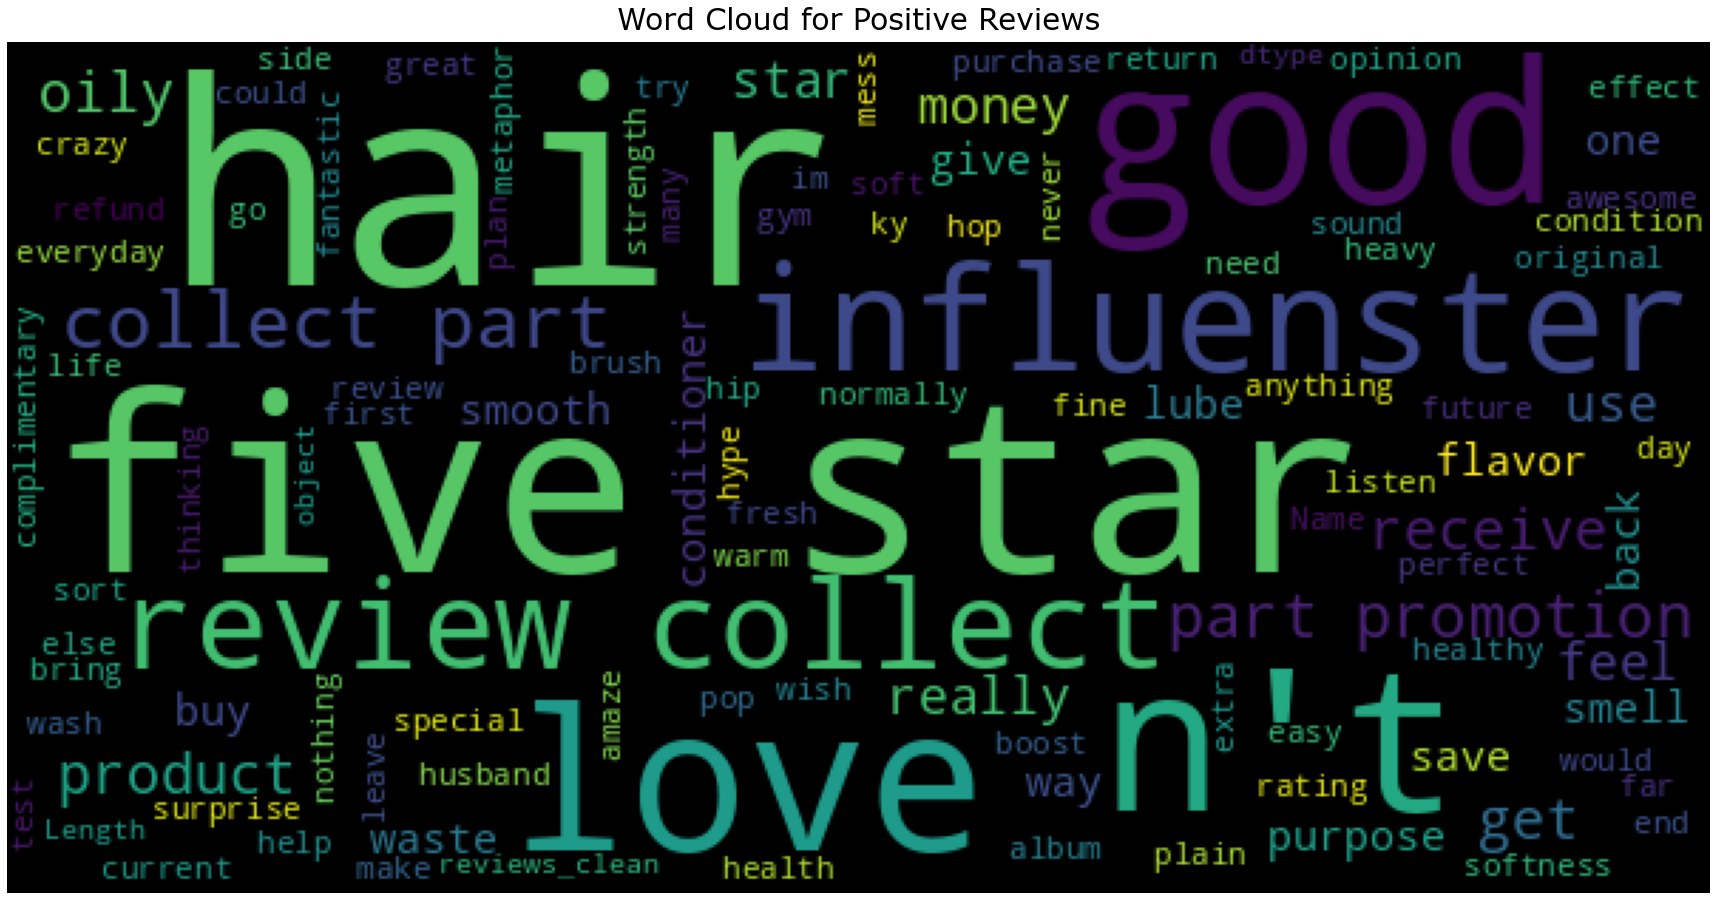

In [89]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop, max_words = 250,
                    max_font_size = 100, random_state = 42, width=600, height=300)
# to see the positive reviews wordcloud
wordcloud.generate(str(_pdf['reviews_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud for Positive Reviews", fontdict={'size': 30, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

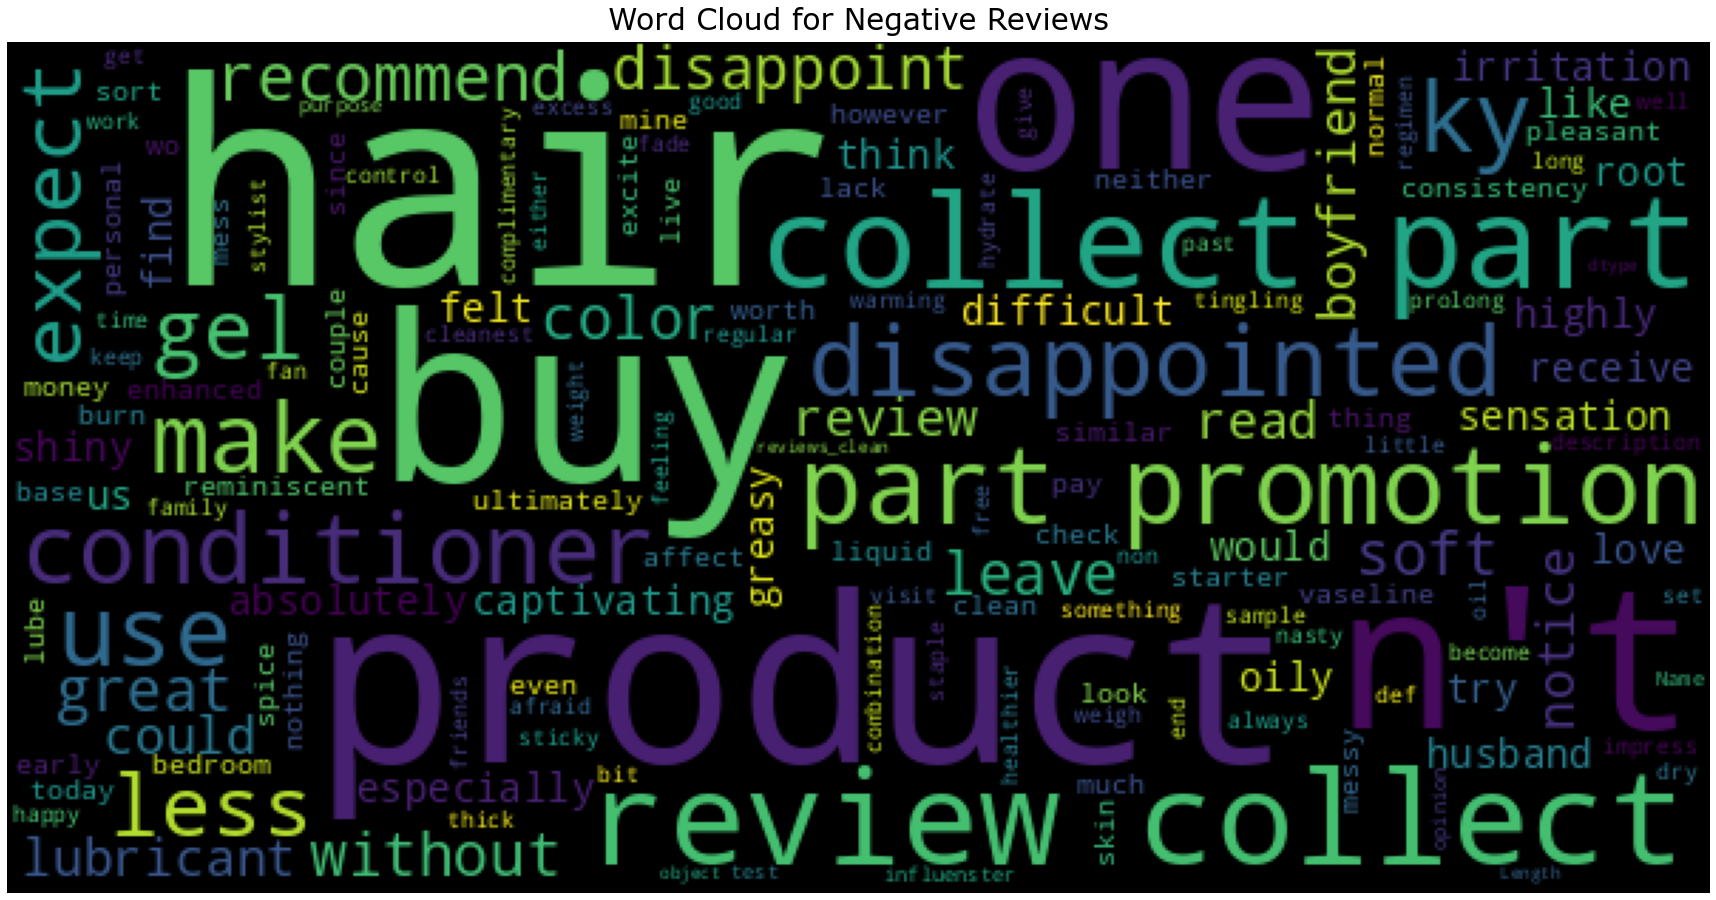

In [90]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop,max_words = 250,
                    max_font_size = 100, random_state = 42, width=600, height=300)
# to see the positive reviews wordcloud
wordcloud.generate(str(_ndf['reviews_clean']))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud for Negative Reviews", fontdict={'size': 30, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

In [91]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

In [92]:
nltk.download('punkt')
word_frequency = word_count(_pdf['reviews_clean']) #tokenize and count and create dictionary

[nltk_data] Downloading package punkt to /Users/k0r05mk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
df_pos = pd.DataFrame(columns=['word', 'count'])
df_pos['word'] = word_frequency.keys()
df_pos['count'] = list(word_frequency.values())
df_pos=df_pos.sort_values(by=['count'], ascending=False)
df_pos=df_pos.reset_index(drop=True)

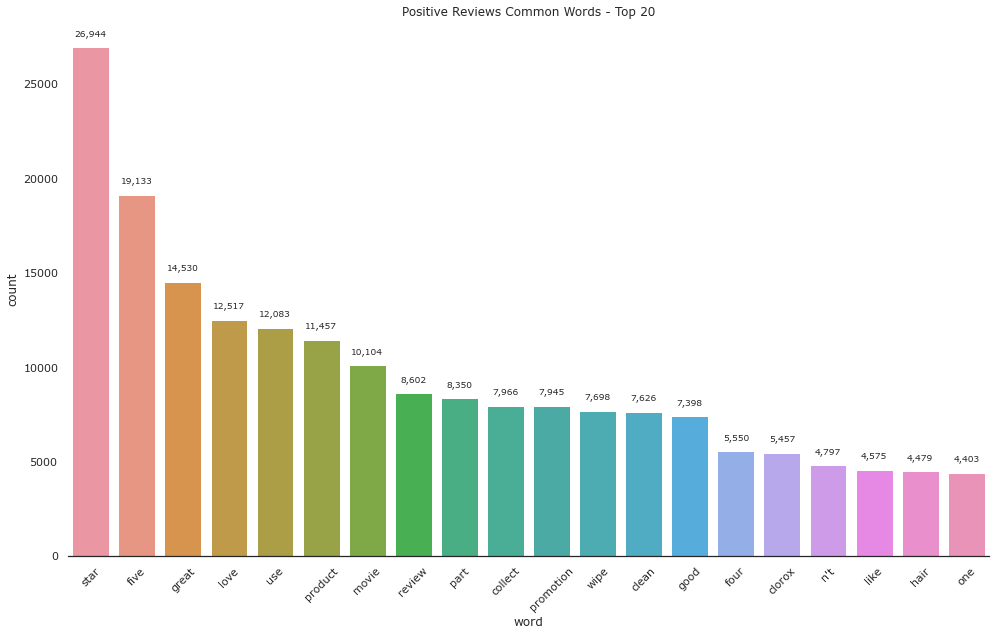

In [94]:
plt.figure(figsize=(14,9))
plt.title('Positive Reviews Common Words - Top 20')
plt.xticks(rotation=45)
ax = sns.barplot("word","count", data=df_pos[:20])
fnautolabelbar(ax,fmt='{0:,.0f}',orient='v')

# Remove legend
ax.legend([],[], frameon=False)

plt.tight_layout()
sns.despine(left=True)
plt.show()

In [95]:
word_frequency = word_count(_ndf['reviews_clean']) #tokenize and count and create dictionary

In [96]:
df_neg = pd.DataFrame(columns=['word', 'count'])
df_neg['word'] = word_frequency.keys()
df_neg['count'] = list(word_frequency.values())
df_neg=df_neg.sort_values(by=['count'], ascending=False)
df_neg=df_neg.reset_index(drop=True)

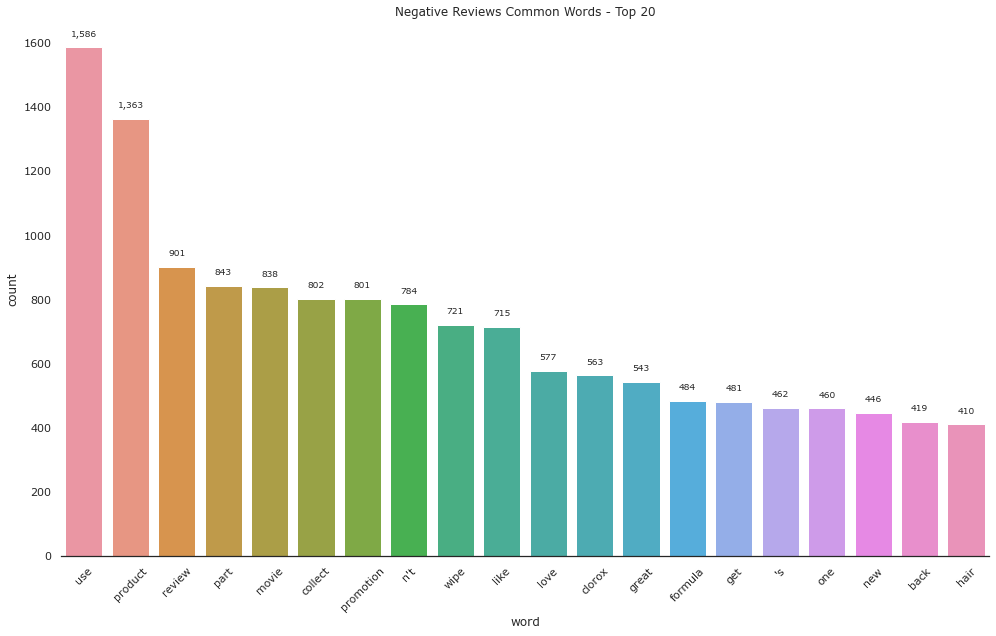

In [97]:
plt.figure(figsize=(14,9))
plt.title('Negative Reviews Common Words - Top 20')
plt.xticks(rotation=45)
ax = sns.barplot("word","count", data=df_neg[:20])
fnautolabelbar(ax,fmt='{0:,.0f}',orient='v')

# Remove legend
ax.legend([],[], frameon=False)

plt.tight_layout()
sns.despine(left=True)
plt.show()

**Observation** The word-cloud and word-count plots show that top words frequencies for Positive and Negative Sentiments. They do have few words that occur in both context. 

In [98]:
#Proceed to Drop the review_consolidated columns.
df = df.drop(['review_consolidated'],axis=1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29937 non-null  object
 1   brand             29937 non-null  object
 2   name              29937 non-null  object
 3   reviews_rating    29937 non-null  int64 
 4   reviews_username  29937 non-null  object
 5   sentiment         29937 non-null  int64 
 6   reviews_clean     29937 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.8+ MB


#### Checkpoint - Save Dataframe

In [100]:
#Save Dataframe to Pickle file. We'll use it to restore when needed, to avoid running all of the EDA and Cleaning steps
DFRAME_NAME = "Cleandf.pkl"
df.to_pickle(MODEL_DIR+DFRAME_NAME)

In [101]:
 #Check reading back from pickled Dataframe.
_df = pd.read_pickle(MODEL_DIR+DFRAME_NAME)
_df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS  Lundberg          
2  AV14LG0R-jtxr-f38QfS  Lundberg          
3  AV16khLE-jtxr-f38VFn  K-Y               
4  AV16khLE-jtxr-f38VFn  K-Y               

                                         name  reviews_rating  \
0  Pink Friday: Roman Reloaded Re-Up (w/dvd)   5                
1  Lundberg Organic Cinnamon Toast Rice Cakes  5                
2  Lundberg Organic Cinnamon Toast Rice Cakes  5                
3  K-Y Love Sensuality Pleasure Gel            1                
4  K-Y Love Sensuality Pleasure Gel            1                

  reviews_username  sentiment  \
0  joshua           0           
1  dorothy w        0           
2  dorothy w        0           
3  rebecca          1           
4  walker557        1           

                                                                                                                                                                                                                                                                                                                                                                                                                        reviews_clean  
0  awesome five star love album 's good hip hop side current pop sound .. hype listen everyday gym give star rating way metaphor crazy                                                                                                                                                                                                                                                                                                 
1  good five star good flavor review collect part promotion                                                                                                                                                                                                                                                                                                                                                                            
2  good five star good flavor                                                                                                                                                                                                                                                                                                                                                                                                          
3  disappointed read review look buy one couple lubricant ultimately disappointed n't even live review read starter neither boyfriend could notice sort enhanced 'captivating sensation notice however messy consistency reminiscent liquid-y vaseline difficult clean pleasant especially since lack 'captivating sensation expect 'm disappointed pay much lube wo n't use could use normal personal lubricant less money less mess  
4  irritation husband buy gel us gel cause irritation felt like burn skin would n't recommend gel

### Feature Extraction (TFIDF)

In [102]:
# Putting feature variable to X
X = df['reviews_clean']
# Putting response variable to y
y = df['sentiment']

In [103]:
# Split the dataset into test and train
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=seed)

#### Build TFIDF

In [104]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',    # Remove accents and perform other character normalization during the preprocessing step. 
    ngram_range=(1, 2),         # The lower and upper boundary of the range of n-values for different n-grams to be extracted
    max_df=0.5,                 #
    max_features=4000)          #

word_vectorizer.fit(X_train)    # Fitting on entire corpus

TfidfVectorizer(max_df=0.5, max_features=4000, ngram_range=(1, 2),
                strip_accents='unicode')

In [105]:
wordVectorizer = word_vectorizer.fit_transform(X) # Fitting on entire corpus

In [106]:
wordVectorizer

<29937x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 672587 stored elements in Compressed Sparse Row format>

#### Save TFIDF vectors

In [107]:
VECTOR_FILE = 'wordVectorizer.pkl'

In [108]:
#Pickling the vectorizer model for later use during app deployment
pickle.dump(wordVectorizer, open(MODEL_DIR+VECTOR_FILE, 'wb'),pickle.HIGHEST_PROTOCOL)

#### Train and Test vectorizion

In [109]:
## transforming the train and test datasets
X_train_transformed = word_vectorizer.transform(X_train)
X_test_transformed = word_vectorizer.transform(X_test)

## Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (23949, 4000)
y_train (23949,)
X_test_transformed (5988, 4000)
y_test (5988,)


#### Implement SMOTE for Class Imbalance

In [110]:
from imblearn.over_sampling import SMOTE
counter = Counter(y_train)
print('Before',counter)
# download imblearn library
sm = SMOTE()
# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)
counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 21247, 1: 2702})
After Counter({0: 21247, 1: 21247})


We'll use ADASYN for our Class Imbalance Fix.

**ADASYN**:  
ADAptive SYNthetic (ADASYN) is based on the idea of adaptively generating minority data samples according to their distributions using K nearest neighbor. The algorithm adaptively updates the distribution and there are no assumptions made for the underlying distribution of the data.  The algorithm uses Euclidean distance for KNN Algorithm. The key difference between ADASYN and SMOTE is that the former uses a density distribution, as a criterion to automatically decide the number of synthetic samples that must be generated for each minority sample by adaptively changing the weights of the different minority samples to compensate for the skewed distributions. The latter generates the same number of synthetic samples for each original minority sample.

#### Implement ADASYN for Class Imbalance

In [111]:
from imblearn.over_sampling import ADASYN
counter = Counter(y_train)
print('Before',counter)
# download imblearn library
ada = ADASYN()
# transform the dataset
X_train_transformed_ada, y_train_ada = ada.fit_resample(X_train_transformed, y_train)
counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 21247, 1: 2702})
After Counter({0: 21247, 1: 20691})


In [112]:
train_feat_ada = pd.DataFrame(X_train_transformed_ada.toarray(), columns = word_vectorizer.get_feature_names())

### Sentiment Model 

#### Utility Functions

For the Model evaluation, we intend to use the following Metrics

**Confusion matrix** : Shows a grid of true and false predictions compared to the actual values

**ROC Curve** : Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

**AUC (for ROC)**: Measures the overall separability between classes of the model related to the ROC curve

**Precision-Recall-Curve** : Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values over-represented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

**F1 Score**: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

----
***As Previously stated, Recall will be our preferred metric for Model Selection. We plot other Metrics for better insights and use in case of a tie***

In [113]:
# Reusing the Confusion matrix plotter - utility function from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py 
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(cf,classifier_name):
  
    # Generate Text Inside each Square
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    box_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(2,2)

    # Generate Summary Statistics & Text for Summary Statistics
    # Accuracy = sum of diagonal divided by total observations
    accuracy  = np.trace(cf) / float(np.sum(cf))
    
    #if it is a binary confusion matrix, show some more stats
    if len(cf)==2:
      # Calculate Metrics for Binary Confusion Matrix
      # Get tn,fp,fn,tp from Confusion Matrix
      tn, fp, fn, tp = cf.ravel()
      precision = tp / (tp+fp)
      recall    = tp / (tp+fn)
      f1_score  = 2*precision*recall / (precision + recall)
      stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
    else:
      stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)

    # Set a Default figuresize 
    plt.figure (figsize = (9,6), dpi=90)
    # Plot heatmap
    sns.heatmap(cf, annot=box_labels, fmt='', cmap='Blues',cbar=False)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'{classifier_name} - Confusion Matrix', fontweight = 'bold')
    plt.show()
    print("----")
    print(f'Model Summary Metrics: {stats_text}')
    print("----")
    return print("")

In [114]:
# Reusing the utility functions from https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d 
# Define a function that plots the ROC curve and the AUC score
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [115]:
# Reusing the utility functions from https://towardsdatascience.com/machine-learning-case-study-telco-customer-churn-prediction-bc4be03c9e1d 
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    print(" ")
    return print(f'F1 Score: {f1_score_result} \n\nAUC Score (PR): {auc_score_result}\n')

In [116]:
# Define a function that plots the PPV, NPV,TPR, FNR and other related metrics.
def print_classification_metrics(y_test,y_pred):
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  metrics = { "Sensitivity (TPR)"  : tp / (tp+fn), "Specificity (TNR)"  : tn / (tn+fp), "Precision (PPV)" : tp / (tp+fp), "Negative_Predictive_Value(NPV)" : tn / (tn+fn),
              "False_Negative_Rate (FNR)" : 1 - (tp / (tp+fn)), "False_Positive_Rate (FPR)": 1 - (tn / (tn+fp)) }
  print("Positive Class (0) : +Ve Sentiment")
  print("Negative Class (1) : -Ve Sentiment")
  display(pd.DataFrame(data=metrics,index=[1]).T)

#### Multinomial Naive Bayes (Default)

In [117]:
from sklearn.naive_bayes import MultinomialNB
#Initialize Model
start_time = time.time()

mnb = MultinomialNB(alpha=0.1)
#Fit Model
mnb.fit(X_train_transformed,y_train)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(mnb.get_params())

Time Taken: 0.01 seconds
Parameters currently in use:

{'alpha': 0.1, 'class_prior': None, 'fit_prior': True}


In [118]:
# Prediction Train Data
y_pred_train = mnb.predict(X_train_transformed)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train, y_pred_train),
                                                                                                  precision_score(y_train, y_pred_train),
                                                                                                  recall_score(y_train, y_pred_train),
                                                                                                  f1_score(y_train, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.903
Precision=0.685
Recall=0.255
F1 Score=0.372
----


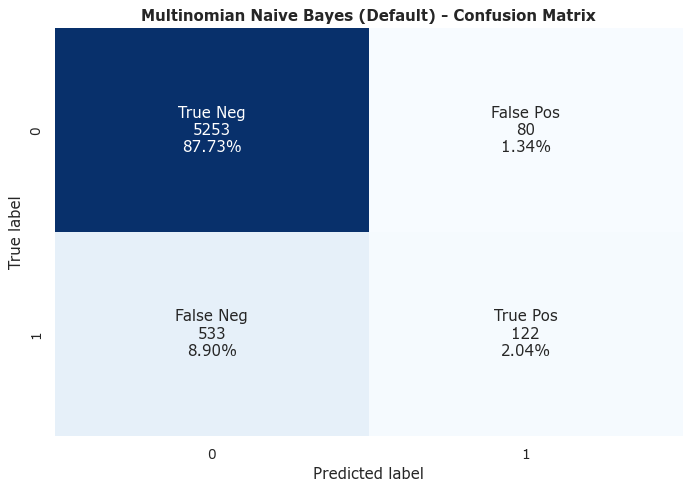

----
Model Summary Metrics: 

Accuracy=0.898
Precision=0.604
Recall=0.186
F1 Score=0.285
----

---


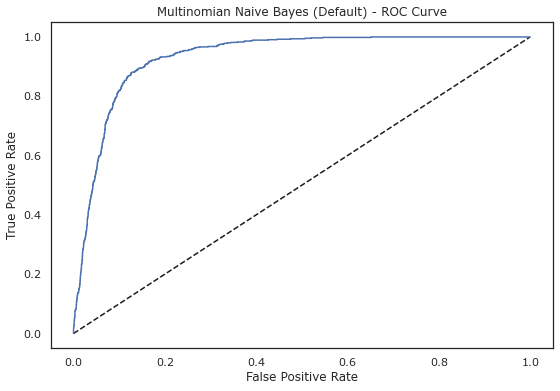

AUC Score (ROC): 0.9323599423437247

---


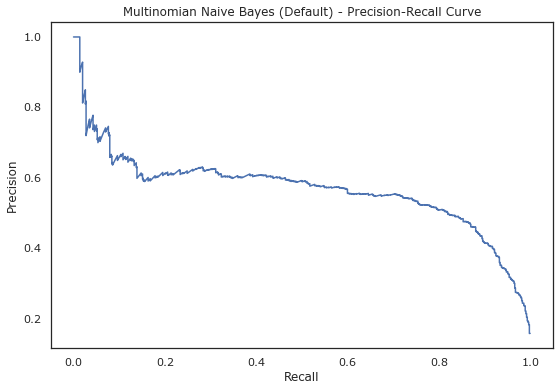

 
F1 Score: 0.2847141190198366 

AUC Score (PR): 0.5682401209302952

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.186260
Specificity (TNR)               0.984999
Precision (PPV)                 0.603960
Negative_Predictive_Value(NPV)  0.907881
False_Negative_Rate (FNR)       0.813740
False_Positive_Rate (FPR)       0.015001

---


In [119]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = mnb.predict(X_test_transformed)
y_pred_test_prob = mnb.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Multinomian Naive Bayes (Default)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Multinomian Naive Bayes (Default)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Multinomian Naive Bayes (Default)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

#### Multinomial Naive Bayes (SMOTE)


In [120]:
#Initialize Model
start_time = time.time()

mnb_sm = MultinomialNB()
#Fit Model
mnb_sm.fit(X_train_transformed_sm,y_train_sm)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(mnb_sm.get_params())

Time Taken: 0.01 seconds
Parameters currently in use:

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


In [121]:
# Prediction Train Data
y_pred_train = mnb_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train_sm, y_pred_train),
                                                                                                  precision_score(y_train_sm, y_pred_train),
                                                                                                  recall_score(y_train_sm, y_pred_train),
                                                                                                  f1_score(y_train_sm, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.917
Precision=0.919
Recall=0.914
F1 Score=0.916
----


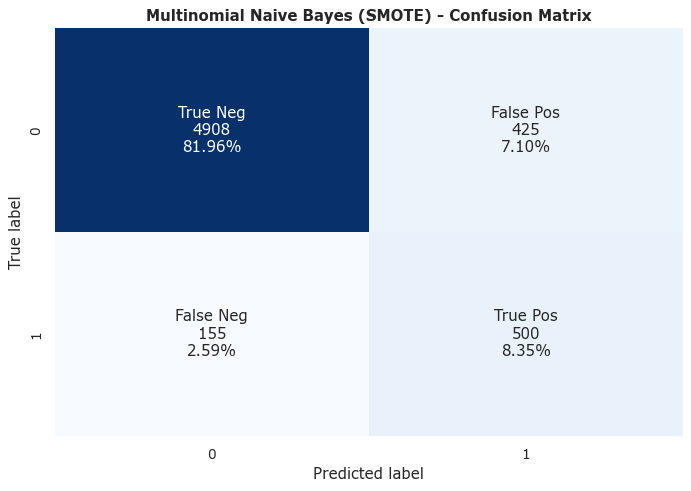

----
Model Summary Metrics: 

Accuracy=0.903
Precision=0.541
Recall=0.763
F1 Score=0.633
----

---


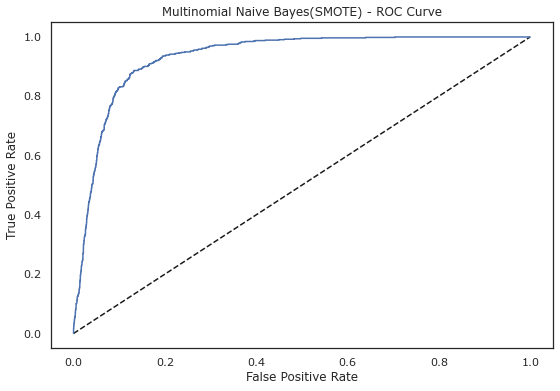

AUC Score (ROC): 0.9326808593476024

---


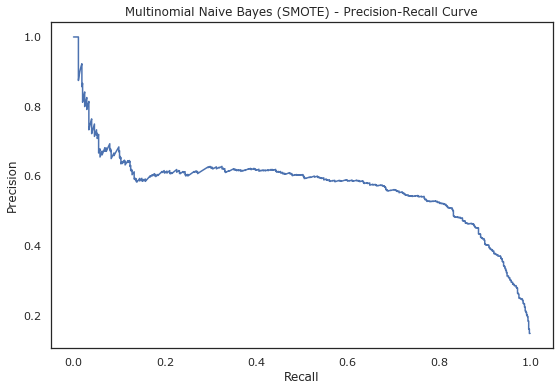

 
F1 Score: 0.6329113924050633 

AUC Score (PR): 0.5718894097123963

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.763359
Specificity (TNR)               0.920308
Precision (PPV)                 0.540541
Negative_Predictive_Value(NPV)  0.969386
False_Negative_Rate (FNR)       0.236641
False_Positive_Rate (FPR)       0.079692

---


In [122]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = mnb_sm.predict(X_test_transformed)
y_pred_test_prob = mnb_sm.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Multinomial Naive Bayes (SMOTE)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Multinomial Naive Bayes(SMOTE)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Multinomial Naive Bayes (SMOTE)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

#### Multinomial Naive Bayes (ADASYN)

In [123]:
#Initialize Model
start_time = time.time()

mnb_ada = MultinomialNB()
#Fit Model
mnb_ada.fit(X_train_transformed_ada,y_train_ada)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(mnb_ada.get_params())

Time Taken: 0.01 seconds
Parameters currently in use:

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}


In [124]:
# Prediction Train Data
y_pred_train = mnb_ada.predict(X_train_transformed_ada)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train_ada, y_pred_train),
                                                                                                  precision_score(y_train_ada, y_pred_train),
                                                                                                  recall_score(y_train_ada, y_pred_train),
                                                                                                  f1_score(y_train_ada, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.916
Precision=0.911
Recall=0.918
F1 Score=0.915
----


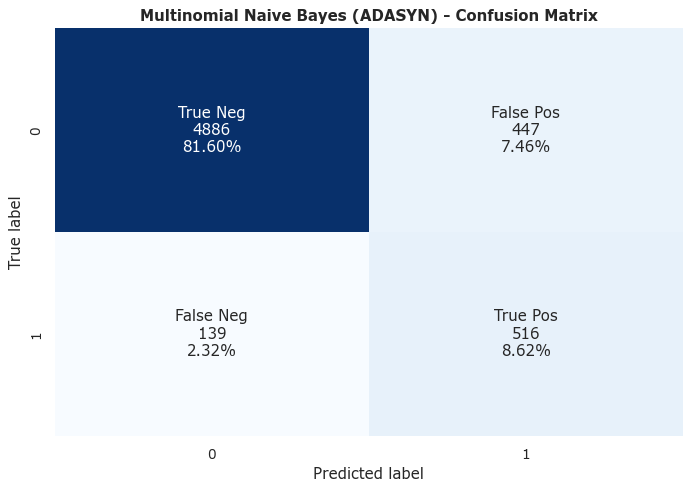

----
Model Summary Metrics: 

Accuracy=0.902
Precision=0.536
Recall=0.788
F1 Score=0.638
----

---


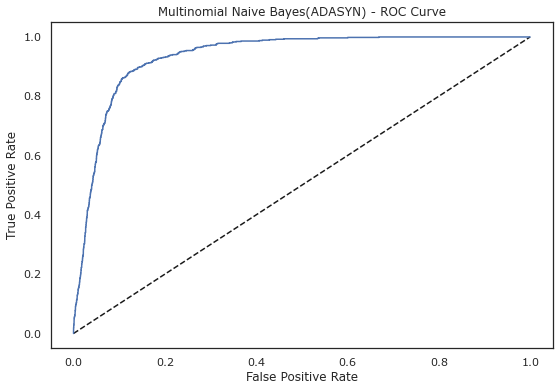

AUC Score (ROC): 0.9348934976374956

---


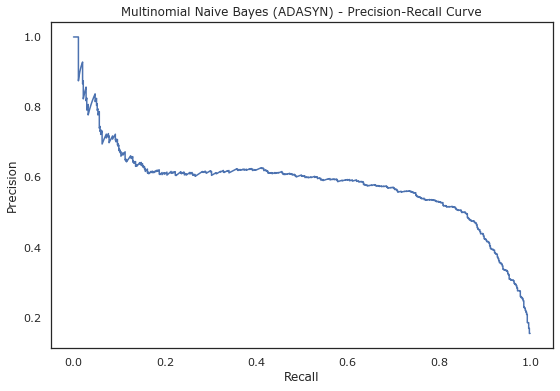

 
F1 Score: 0.6378244746600742 

AUC Score (PR): 0.5816501582295768

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.787786
Specificity (TNR)               0.916182
Precision (PPV)                 0.535826
Negative_Predictive_Value(NPV)  0.972338
False_Negative_Rate (FNR)       0.212214
False_Positive_Rate (FPR)       0.083818

---


In [125]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = mnb_ada.predict(X_test_transformed)
y_pred_test_prob = mnb_ada.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Multinomial Naive Bayes (ADASYN)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Multinomial Naive Bayes(ADASYN)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Multinomial Naive Bayes (ADASYN)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

**Observation** 

Multinomial Naive Bayes performance to Class Imbalance dataset was poor with F1-Score of ~28%. 
On applying SMOTE and ADASYN approaches to address Class Imbalancing, we were able to better the recall numbers 
to ~63% respectively without much impact to Accuracy and Precision numbers. 

No Hyperparameter Tuning is required. We'll revisit if other models are performing poorly. 

In [126]:
#### Saving Best Model - Multinomial Naive Bayes

In [127]:
# save the model to disk
MDL_FILE = 'MultinomialNaiveBayes.pkl'
pickle.dump(mnb_ada, open(MODEL_DIR+MDL_FILE, 'wb'),pickle.HIGHEST_PROTOCOL)

#### Random Forest Classifier (Default)

In [128]:
#Initialize Model
start_time = time.time()

rf = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=400)
#Fit Model
rf.fit(X_train_transformed,y_train)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(rf.get_params())

Time Taken: 6.18 seconds
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [129]:
# Prediction Train Data
y_pred_train = rf.predict(X_train_transformed)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train, y_pred_train),
                                                                                                  precision_score(y_train, y_pred_train),
                                                                                                  recall_score(y_train, y_pred_train),
                                                                                                  f1_score(y_train, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=1.000
Precision=1.000
Recall=1.000
F1 Score=1.000
----


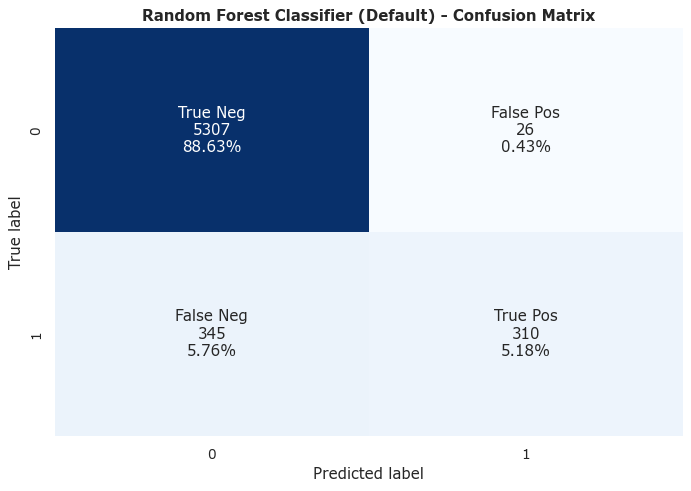

----
Model Summary Metrics: 

Accuracy=0.938
Precision=0.923
Recall=0.473
F1 Score=0.626
----

---


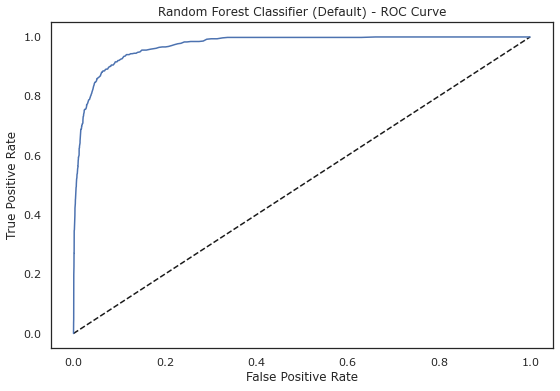

AUC Score (ROC): 0.9718649400320345

---


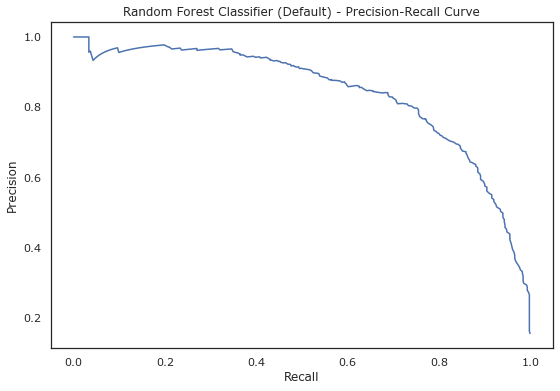

 
F1 Score: 0.625630676084763 

AUC Score (PR): 0.8417242627381383

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.473282
Specificity (TNR)               0.995125
Precision (PPV)                 0.922619
Negative_Predictive_Value(NPV)  0.938960
False_Negative_Rate (FNR)       0.526718
False_Positive_Rate (FPR)       0.004875

---


In [130]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = rf.predict(X_test_transformed)
y_pred_test_prob = rf.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Random Forest Classifier (Default)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Random Forest Classifier (Default)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Random Forest Classifier (Default)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

#### Random Forest Classifier (SMOTE)

In [131]:
#Initialize Model
start_time = time.time()

rf_sm = RandomForestClassifier(n_estimators=400,
                               max_depth = 10,
                               max_features=250,
                               min_samples_split=150,
                               random_state=42,
                               n_jobs=-1)

#Fit Model
rf_sm.fit(X_train_transformed_sm,y_train_sm)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(rf_sm.get_params())

Time Taken: 4.98 seconds
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 250,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 150,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [132]:
# Prediction Train Data
y_pred_train = rf_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train_sm, y_pred_train),
                                                                                                  precision_score(y_train_sm, y_pred_train),
                                                                                                  recall_score(y_train_sm, y_pred_train),
                                                                                                  f1_score(y_train_sm, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.882
Precision=0.823
Recall=0.974
F1 Score=0.892
----


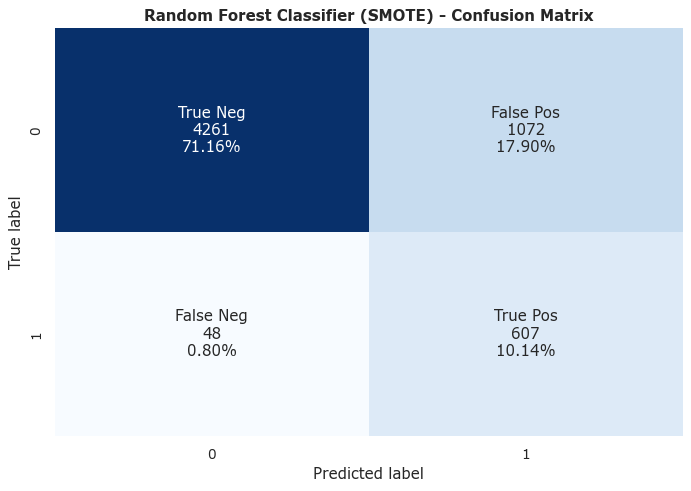

----
Model Summary Metrics: 

Accuracy=0.813
Precision=0.362
Recall=0.927
F1 Score=0.520
----

---


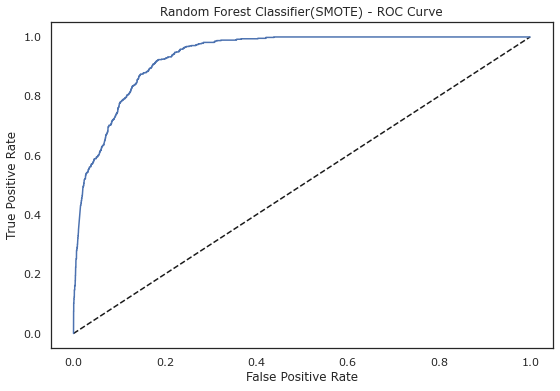

AUC Score (ROC): 0.9381208462933515

---


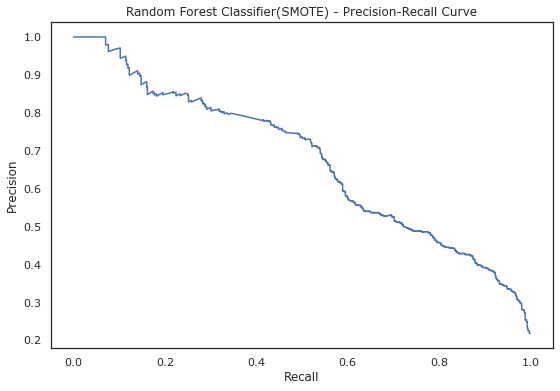

 
F1 Score: 0.5201371036846615 

AUC Score (PR): 0.6742228340116485

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.926718
Specificity (TNR)               0.798987
Precision (PPV)                 0.361525
Negative_Predictive_Value(NPV)  0.988861
False_Negative_Rate (FNR)       0.073282
False_Positive_Rate (FPR)       0.201013

---


In [133]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = rf_sm.predict(X_test_transformed)
y_pred_test_prob = rf_sm.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Random Forest Classifier (SMOTE)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Random Forest Classifier(SMOTE)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Random Forest Classifier(SMOTE)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

In [134]:
#### Hyperparameter tuning (Random Forest) **Skipped**

In [135]:
from sklearn.model_selection import GridSearchCV

#Convert to array to pass to Gridsearch

X_train_array = X_train_transformed.toarray()
X_test_array = X_test_transformed.toarray()

param_grid = {
    'max_depth':[5,10],
    'max_features':[250,400],
    'min_samples_leaf':[150,200],
    'min_samples_split':[150,200]
}


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, scoring="recall", return_train_score=True)

pp.pprint(grid_search)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=400, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'max_features': [250, 400],
                         'min_samples_leaf': [150, 200],
                         'min_samples_split': [150, 200]},
             return_train_score=True, scoring='recall', verbose=2)


In [136]:
#%%timeit
#grid_search.fit(X_train_array,y_train)

**Observation** 

Random Forest performance to Class Imbalance dataset with F1-Score of ~62%. 
It clearly overfitted training data and probably needs a Hyperparameter tuning to figure out the parameters to determine optimal  optimal Recall.

We tried to use SMOTE applied dataset, and we were unable better our 'F1-score' numbers 
(dropped to 52%) without much impact to Accracy and Precision numbers. 

Note: We applied Random initialization values to hyper parameters which themselves resulted in improving recall performance 

* n_estimators=400
* max_depth=10
* max_features=250
* min_samples_split=150

No Hyperparameter Tuning is further required. We'll revisit if other models are poorly performing. 

#### Saving Best Model - RandomForest Classifier

In [137]:
# save the model to disk
MDL_FILE = 'RandomForestClassifier.pkl'
pickle.dump(rf_sm, open(MODEL_DIR+MDL_FILE, 'wb'),pickle.HIGHEST_PROTOCOL)

#### Logistic Regression Model (Default)

In [138]:
#Initialize Model
start_time = time.time()

lr = LogisticRegression(random_state=42,max_iter=200)
#Fit Model
lr.fit(X_train_transformed,y_train)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(lr.get_params())

Time Taken: 0.42 seconds
Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [139]:
# Prediction Train Data
y_pred_train = lr.predict(X_train_transformed)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train, y_pred_train),
                                                                                                  precision_score(y_train, y_pred_train),
                                                                                                  recall_score(y_train, y_pred_train),
                                                                                                  f1_score(y_train, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.950
Precision=0.978
Recall=0.568
F1 Score=0.718
----


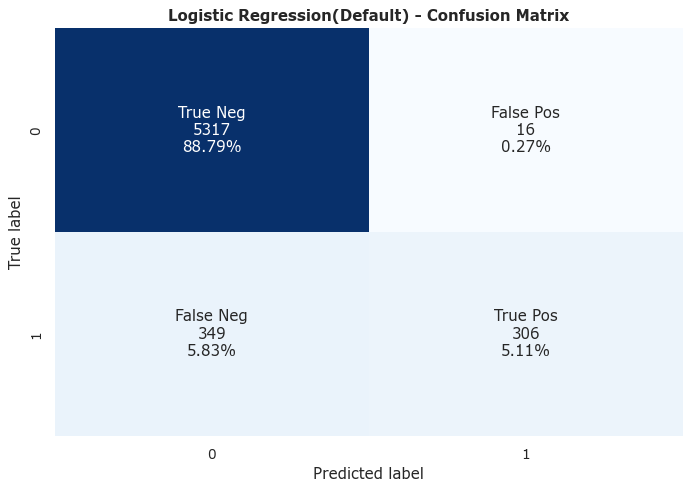

----
Model Summary Metrics: 

Accuracy=0.939
Precision=0.950
Recall=0.467
F1 Score=0.626
----

---


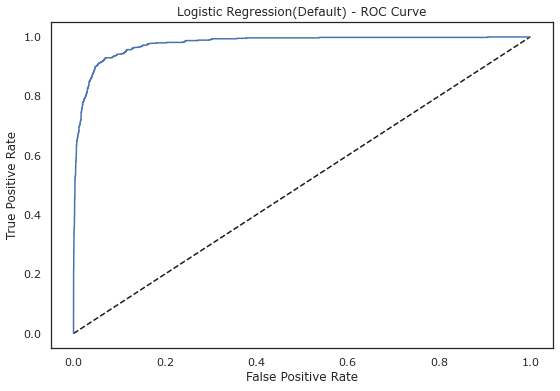

AUC Score (ROC): 0.9778268107405568

---


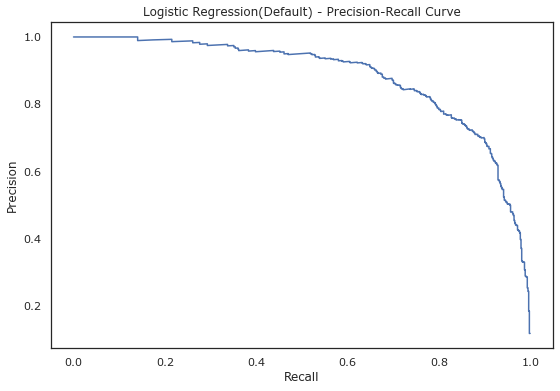

 
F1 Score: 0.6264073694984648 

AUC Score (PR): 0.8823392345641929

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.467176
Specificity (TNR)               0.997000
Precision (PPV)                 0.950311
Negative_Predictive_Value(NPV)  0.938405
False_Negative_Rate (FNR)       0.532824
False_Positive_Rate (FPR)       0.003000

---


In [140]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = lr.predict(X_test_transformed)
y_pred_test_prob = lr.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Logistic Regression(Default)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Logistic Regression(Default)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Logistic Regression(Default)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

#### Logistic Regression Model (SMOTE)

In [141]:
#Initialize Model
start_time = time.time()

lr_sm = LogisticRegression(random_state=42,max_iter=200)
#Fit Model
lr_sm.fit(X_train_transformed_sm,y_train_sm)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(lr_sm.get_params())

Time Taken: 0.55 seconds
Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [142]:
# Prediction Train Data
y_pred_train = lr_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train_sm, y_pred_train),
                                                                                                  precision_score(y_train_sm, y_pred_train),
                                                                                                  recall_score(y_train_sm, y_pred_train),
                                                                                                  f1_score(y_train_sm, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.974
Precision=0.959
Recall=0.990
F1 Score=0.975
----


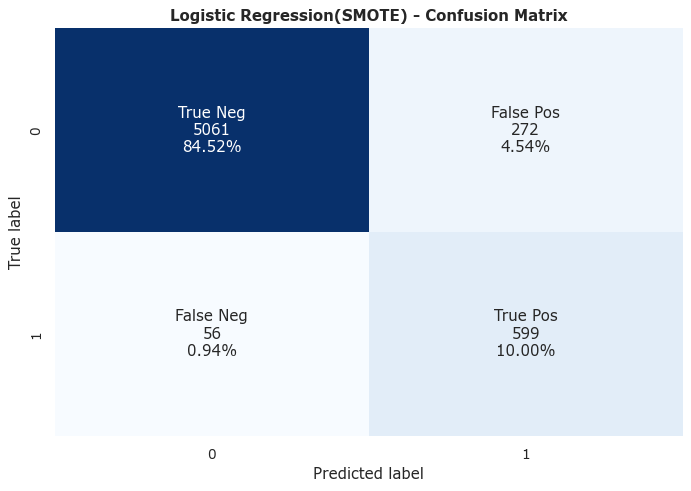

----
Model Summary Metrics: 

Accuracy=0.945
Precision=0.688
Recall=0.915
F1 Score=0.785
----

---


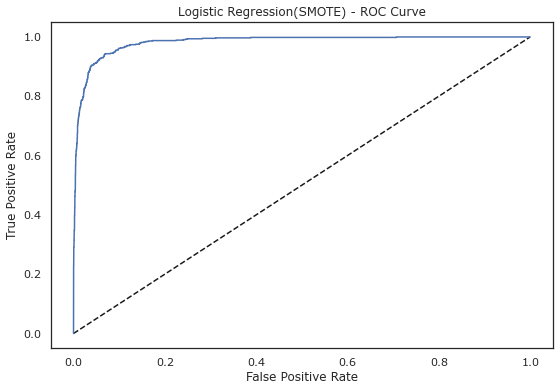

AUC Score (ROC): 0.9823806258883547

---


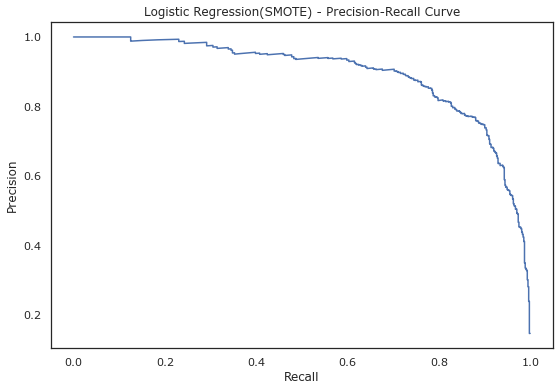

 
F1 Score: 0.7850589777195282 

AUC Score (PR): 0.8951505625240163

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.914504
Specificity (TNR)               0.948997
Precision (PPV)                 0.687715
Negative_Predictive_Value(NPV)  0.989056
False_Negative_Rate (FNR)       0.085496
False_Positive_Rate (FPR)       0.051003

---


In [143]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = lr_sm.predict(X_test_transformed)
y_pred_test_prob = lr_sm.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Logistic Regression(SMOTE)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Logistic Regression(SMOTE)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Logistic Regression(SMOTE)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

#### Logistic Regression Model (ADASYN)

In [144]:
#Initialize Model
start_time = time.time()

lr_ada = LogisticRegression(random_state=42,max_iter=200)
#Fit Model
lr_ada.fit(X_train_transformed_ada,y_train_ada)

time_elapsed = time.time() - start_time
print('Time Taken: {:.2f} seconds'.format(time_elapsed))

# Look at parameters
print('Parameters currently in use:\n')
pp.pprint(lr_ada.get_params())

Time Taken: 0.40 seconds
Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [145]:
# Prediction Train Data
y_pred_train = lr_ada.predict(X_train_transformed_ada)

#Model Performance on Train Dataset
display_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy_score(y_train_ada, y_pred_train),
                                                                                                  precision_score(y_train_ada, y_pred_train),
                                                                                                  recall_score(y_train_ada, y_pred_train),
                                                                                                  f1_score(y_train_ada, y_pred_train))
print("----")
print(f'Model Summary Metrics (Training): {display_text}')
print("----")

----
Model Summary Metrics (Training): 

Accuracy=0.974
Precision=0.957
Recall=0.992
F1 Score=0.974
----


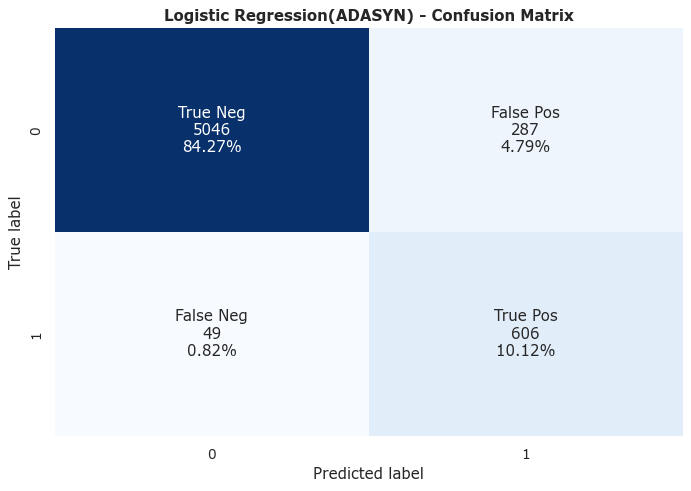

----
Model Summary Metrics: 

Accuracy=0.944
Precision=0.679
Recall=0.925
F1 Score=0.783
----

---


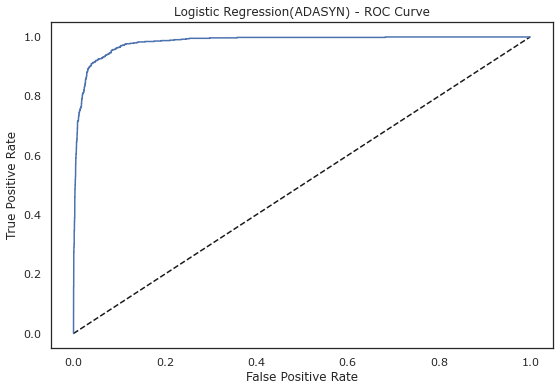

AUC Score (ROC): 0.9833070196658285

---


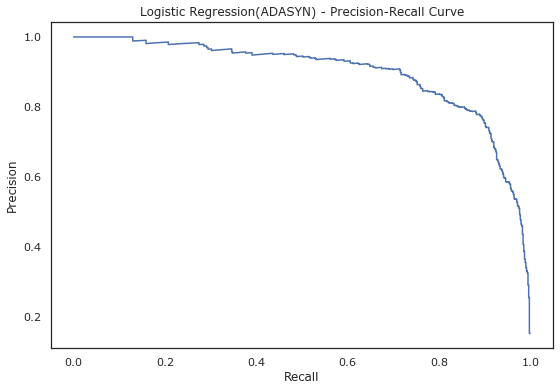

 
F1 Score: 0.7829457364341087 

AUC Score (PR): 0.8973454950243557

---
Positive Class (0) : +Ve Sentiment
Negative Class (1) : -Ve Sentiment


1
Sensitivity (TPR)               0.925191
Specificity (TNR)               0.946184
Precision (PPV)                 0.678611
Negative_Predictive_Value(NPV)  0.990383
False_Negative_Rate (FNR)       0.074809
False_Positive_Rate (FPR)       0.053816

---


In [146]:
# Make Predictions for the Test set based on the Trained Model.
y_pred_test = lr_ada.predict(X_test_transformed)
y_pred_test_prob = lr_ada.predict_proba(X_test_transformed)

#Plot Confusion Matrix,ROC,AUC, Precision Recall curves and Scores. 
cf = confusion_matrix(y_test, y_pred_test)
confusion_matrix_plot(cf,'Logistic Regression(ADASYN)')
print("---")

plt.figure(figsize=(9,6))
roc_curve_auc_score(X_test_transformed,y_test,y_pred_test_prob,'Logistic Regression(ADASYN)')
print("---")

plt.figure(figsize=(9,6))
precision_recall_curve_and_scores(X_test_transformed,y_test,y_pred_test,y_pred_test_prob,'Logistic Regression(ADASYN)')
print("---")

print_classification_metrics(y_test,y_pred_test)
print("---")

In [147]:
# save the model to disk
MDL_FILE = 'LogisticRegression.pkl'
pickle.dump(lr_ada, open(MODEL_DIR+MDL_FILE, 'wb'),pickle.HIGHEST_PROTOCOL)

#### Section Summary

**Observation** 
All of the Models built (MNB, RFC, LR) performed poorly on the base Dataset without handling the Class Imbalance. 

Of the 3 Models : 

* **Logistic Regression (Subjected to ADASYN - Class Imbalance) ** gave the best metrics for F1-Score of 78% without much drop in Accuracy (94%) and Recall (92%)

**Verdict** 
Being a simpler and balanced model ,with less memory foot print and Complexity , We'll proceed to use Logistic Regression  model for our Recommendation System.

## Step 2 : Building a recommendation system

In [148]:
# No. of Unique Users in the Dataset
base_df.reviews_username.nunique()

24914

In [149]:
# No. of Product Categories
base_df['categories'].nunique()

270

In [150]:
# No. of Products
base_df['name'].nunique()

271

** Observations **
There are 271 x 270 Product Category combinations to build a Product based recommendation. 

From the Dataset we see, 
* There are 25,000 unique users, who buy same products/ products under same category or across categories, this might help with cross category products if we choose User based recommendations
* Every user has purchased a product and has a review. This will help build a simpler user based recommendation model.

### User Based Recommendation

In [151]:
# Test and Train split of the dataset.
train, test = train_test_split(df, test_size=0.20, random_state=42)

In [152]:
# Pivot dataset into matrix format in which columns are products and the rows are user IDs.
user_pivot = pd.pivot_table(train,
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

In [153]:
print(train.shape)
print(test.shape)

(23949, 7)
(5988, 7)


In [154]:
user_pivot.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YpiJvvKc47QAVguxy  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0   

#### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [155]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [156]:
dummy_train.head()

id          brand  \
17335  AVpfazX31cnluZ0-kbdl  Just For Men    
7089   AVpf3VOfilAPnD_xjpun  Clorox          
29154  AVpfW8y_LJeJML437ySW  L'oreal Paris   
28596  AVpftikC1cnluZ0-p31V  Storkcraft      
8254   AVpf3VOfilAPnD_xjpun  Clorox          

                                                                                 name  \
17335  Just For Men Touch Of Gray Gray Hair Treatment, Black T-55                       
7089   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                        
29154  L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz   
28596  Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish           
8254   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                        

       reviews_rating reviews_username  sentiment  \
17335  3               cbgray           0           
7089   4               caradr           0           
29154  4               tess22           0           
28596  5               mischia          0           
8254   5               supermom5457657  0           

                                                                                                                                                                                                                                    reviews_clean  
17335  desire three star look great first week start fade light brown color even sun exposure shower usually use shampoo colored hair ... one day pool sun bleach brownish color ... wish last longer                                              
7089   mrs four star love convenience keep canister wipe bathroom sink quick wipe review collect part promotion                                                                                                                                    
29154  favorite three four star three conditioner favorite smell little good two leave hair soft manageable would n't buy product simply meet expectation smell much luckily receive product influenster try review review collect part promotion  
28596  cute five star pleased chair ottoman though picture show darker beige color really light tan love                                                                                                                                           
8254   clean clean clean five star excellent stuff without smell house get cleeeeean even lot kid run around review collect part promotion

In [157]:
# The Products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x >= 1 else 1)

In [158]:
# Convert the dummy train dataset into matrix format.
user_dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [159]:
user_dummy_train.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1YpiJvvKc47QAVguxy  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0                   1.0                    

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
00sab00           1.0                   1.0                    
01impala          1.0                   1.0                    
02dakota          1.0                   1.0                    
02deuce           1.0                   1.0                    
0325home          1.0   

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. 
To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products. (i.e) We normalize ratings of the user around a mean of 0

In [160]:
user_pivot.index.nunique()

20548

In [161]:
from sklearn.metrics.pairwise import pairwise_distances
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]


In [162]:
print(user_correlation.shape)
print(user_correlation.nbytes/1000/1000/1000,' GB of space')

(20548, 20548)
3.377762432  GB of space


#### Using Adjusted Cosine

Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [163]:
# Pivot dataset into matrix format in which columns are products and the rows are user IDs.
user_adjcosine_pivot = pd.pivot_table(train,
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

Normalising the rating of the product for each user around 0 mean

In [164]:
mean = np.nanmean(user_adjcosine_pivot, axis=1)
user_pivot_nm = (user_adjcosine_pivot.T-mean).T

In [165]:
user_pivot_nm.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1YpiJvvKc47QAVguxy  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN                   NaN                     

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
00sab00          NaN                   NaN                     
01impala         NaN                   NaN                     
02dakota         NaN                   NaN                     
02deuce          NaN                   NaN                     
0325home         NaN    

In [166]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_pivot_nm.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [167]:
print(user_correlation.shape)
print(user_correlation.nbytes/1000/1000/1000,' GB of space')

(20548, 20548)
3.377762432  GB of space


#### Prediction - User User

Predict only for +Ve Correlations

In [168]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [169]:
#this is dot product btw corelated matrix and user-item matrix
user_predicted_ratings = np.dot(user_correlation, user_adjcosine_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 0.        , 1.83339699,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [170]:
user_predicted_ratings.shape

(20548, 264)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero. 

In [171]:
user_final_rating = np.multiply(user_predicted_ratings,user_dummy_train)
user_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00           2.5                   3.697789               
01impala          0.0                   0.000000               
02dakota          0.0                   0.000000               
02deuce           0.0                   0.000000               
0325home          0.0                   0.000000               

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00           0.0                   0.64226                
01impala          0.0                   0.00000                
02dakota          0.0                   0.00000                
02deuce           0.0                   0.00000                
0325home          0.0                   0.00000                

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00           2.620712              1.018079               
01impala          0.000000              0.000000               
02dakota          0.000000              0.000000               
02deuce           0.000000              0.000000               
0325home          0.000000              0.000000               

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YpiJvvKc47QAVguxy  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
00sab00           1.020621              0.0                    
01impala          0.000000              0.0                    
02dakota          0.000000              0.0                    
02deuce           0.000000              0.0                    
0325home          0.0000

#### Finding the top 5 recommendation for the *user*

In [173]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name00sab00
00sab00


In [174]:
user_final_rating.head(7)

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    
06stidriver       0.0                   0.0                    
08dallas          0.0                   0.0                    

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00           2.5                   3.697789               
01impala          0.0                   0.000000               
02dakota          0.0                   0.000000               
02deuce           0.0                   0.000000               
0325home          0.0                   0.000000               
06stidriver       0.0                   0.000000               
08dallas          0.0                   0.000000               

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    
06stidriver       0.0                   0.0                    
08dallas          0.0                   0.0                    

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00           0.0                   0.64226                
01impala          0.0                   0.00000                
02dakota          0.0                   0.00000                
02deuce           0.0                   0.00000                
0325home          0.0                   0.00000                
06stidriver       0.0                   0.00000                
08dallas          0.0                   0.00000                

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00           2.620712              1.018079               
01impala          0.000000              0.000000               
02dakota          0.000000              0.000000               
02deuce           0.000000              0.000000               
0325home          0.000000              0.000000               
06stidriver       0.000000              0.000000               
08dallas          0.000000              0.000000               

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    
06stidriver       0.0                   0.0                    
08dallas          0.0                   0.0                    

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    
06stidriver       0.0                   0.0                    
08dallas          0.0     

In [175]:
user_final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20548 entries, 00sab00 to zzz1127
Columns: 264 entries, AV13O1A8GV-KLJ3akUyj to AVpfvieo1cnluZ0-qdnu
dtypes: float64(264)
memory usage: 41.5+ MB


In [176]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpfPaoqLJeJML435Xk9    47.098791
AVpfRTh1ilAPnD_xYic2    36.741538
AVpf2tw1ilAPnD_xjflC    16.218225
AVpf0eb2LJeJML43EVSt    16.164427
AVpf3VOfilAPnD_xjpun    11.728031
Name: 00sab00, dtype: float64

In [177]:
product_mapping = dict(df.groupby(['id','name'])['id','name'].nunique().index)
mapping_df = pd.DataFrame(columns=['id','name'])
mapping_df['id'] = product_mapping.keys()
mapping_df['name'] = product_mapping.values()

In [178]:
d = pd.merge(d,mapping_df,left_on='id',right_on='id', how = 'left')
d.head()

id    00sab00  \
0  AVpfPaoqLJeJML435Xk9  47.098791   
1  AVpfRTh1ilAPnD_xYic2  36.741538   
2  AVpf2tw1ilAPnD_xjflC  16.218225   
3  AVpf0eb2LJeJML43EVSt  16.164427   
4  AVpf3VOfilAPnD_xjpun  11.728031   

                                                                  name  
0  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd      
1  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)  
2  Red (special Edition) (dvdvideo)                                     
3  The Resident Evil Collection 5 Discs (blu-Ray)                       
4  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total

#### Evaluation - User User 

In [179]:
# Find out the common users of test and train dataset.
common_users = test[test['reviews_username'].isin(train['reviews_username'])]
common_users.shape

(1491, 7)

In [180]:
common_user_pivot = common_users.pivot_table(
    index='reviews_username', 
    columns='id', 
    values='reviews_rating')

In [181]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   91   92   93   94   95   96   97   98   99  ...  20448  20449  20450  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0    0.0     

   20451  20452  20453  20454  20455  20456  20457  20458  20459  20460  \
0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     
1  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     
2  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     

   20461  20462  20463  20464  20465  20466  20467  20468  20469  20470  \
0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     
1  0.0    0.0    0.0    0.0    

In [182]:
# Re-index the correlation df to the same as the normalized user matrix built earlier
user_correlation_df['reviews_username'] = user_pivot_nm.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

0    1    2    3    4    5    6    7    8    9   10   11  \
reviews_username                                                               
00sab00           1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   12   13   14   15   16   17   18   19   20   21   22   23  \
reviews_username                                                               
00sab00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   24   25   26   27   28   29   30   31   32   33   34   35  \
reviews_username                                                               
00sab00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   36   37   38   39   40   41   42   43   44   45   46   47  \
reviews_username                                                               
00sab00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   48   49   50   51   52   53   54   55   56   57   58   59  \
reviews_username                                                               
00sab00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   60   61   62   63   64   65   66   67   68   69   70   71  \
reviews_username                                                               
00sab00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   72   73   74   75   76   77   78   79   80   81   82   83  \
reviews_username                                                               
00sab00           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
01impala          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02dakota          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
02deuce           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
0325home          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   84   85   86   87   88   89   90   91   92   93   94   95  \
reviews_usern

In [183]:
# Build a list with common user names only and take only users from correlation with common users
list_name = common_users.reviews_username.tolist()
user_correlation_df.columns = user_pivot_nm.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [184]:
# Use intermediate dataframes to transpose and build the predicted rating matrix
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3[user_correlation_df_3<0]=0
# Dot product of predicted and original ratings to be used for RMSE computation
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_pivot.fillna(0))
common_user_predicted_ratings

array([[0.        , 1.44337567, 0.        , ..., 0.        , 0.        ,
        1.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [185]:
# Take test data and apply logic for already rated products
dummy_test = common_users.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [186]:
# Recompute predicted ratings for test data
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [187]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Users/k0r05mk/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/k0r05mk/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [188]:
common_ = common_users.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [189]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [190]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5350022500023166


#### Section Summary 
User based Recommendation gives an RMSE of 2.53


### Item Based Recommendation

Taking the transpose of the rating matrix to normalize the rating around the mean for different Product ID. In the user based similarity, we had taken mean for each user instead of each Product. 

In [191]:
# Pivot the train ratings' dataset into matrix format in which columns are users and the rows are product IDs.
item_pivot = pd.pivot_table(train,
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

Normalising the movie rating for each movie for using the Adjusted Cosine

In [192]:
mean = np.nanmean(item_pivot, axis=1)
item_pivot_nm = (item_pivot.T-mean).T

In [193]:
item_pivot_nm.head()

reviews_username      00sab00  01impala  02dakota  02deuce  0325home  \
id                                                                     
AV13O1A8GV-KLJ3akUyj NaN      NaN       NaN       NaN      NaN         
AV14LG0R-jtxr-f38QfS NaN      NaN       NaN       NaN      NaN         
AV16khLE-jtxr-f38VFn NaN      NaN       NaN       NaN      NaN         
AV1YGDqsGV-KLJ3adc-O NaN      NaN       NaN       NaN      NaN         
AV1YIch7GV-KLJ3addeG NaN      NaN       NaN       NaN      NaN         

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  10ten  \
id                                                                              
AV13O1A8GV-KLJ3akUyj NaN          NaN       NaN        NaN       NaN   NaN      
AV14LG0R-jtxr-f38QfS NaN          NaN       NaN        NaN       NaN   NaN      
AV16khLE-jtxr-f38VFn NaN          NaN       NaN        NaN       NaN   NaN      
AV1YGDqsGV-KLJ3adc-O NaN          NaN       NaN        NaN       NaN   NaN      
AV1YIch7GV-KLJ3addeG NaN          NaN       NaN        NaN       NaN   NaN      

reviews_username      11111111aaaaaaaaaaaaaaaaa  11677j  1234  1234561  \
id                                                                       
AV13O1A8GV-KLJ3akUyj NaN                        NaN     NaN   NaN        
AV14LG0R-jtxr-f38QfS NaN                        NaN     NaN   NaN        
AV16khLE-jtxr-f38VFn NaN                        NaN     NaN   NaN        
AV1YGDqsGV-KLJ3adc-O NaN                        NaN     NaN   NaN        
AV1YIch7GV-KLJ3addeG NaN                        NaN     NaN   NaN        

reviews_username      1234567  1234asdf  123cat123  123charlie  123numbers  \
id                                                                           
AV13O1A8GV-KLJ3akUyj NaN      NaN       NaN        NaN         NaN           
AV14LG0R-jtxr-f38QfS NaN      NaN       NaN        NaN         NaN           
AV16khLE-jtxr-f38VFn NaN      NaN       NaN        NaN         NaN           
AV1YGDqsGV-KLJ3adc-O NaN      NaN       NaN        NaN         NaN           
AV1YIch7GV-KLJ3addeG NaN      NaN       NaN        NaN         NaN           

reviews_username      123rs  123soccermom  123too  127726  12cass12  12gage  \
id                                                                            
AV13O1A8GV-KLJ3akUyj NaN    NaN           NaN     NaN     NaN       NaN       
AV14LG0R-jtxr-f38QfS NaN    NaN           NaN     NaN     NaN       NaN       
AV16khLE-jtxr-f38VFn NaN    NaN           NaN     NaN     NaN       NaN       
AV1YGDqsGV-KLJ3adc-O NaN    NaN           NaN     NaN     NaN       NaN       
AV1YIch7GV-KLJ3addeG NaN    NaN           NaN     NaN     NaN       NaN       

reviews_username      132457  13dani  13ram  13thfaerie  1421nikki  143st  \
id                                                                          
AV13O1A8GV-KLJ3akUyj NaN     NaN     NaN    NaN         NaN        NaN      
AV14LG0R-jtxr-f38QfS NaN     NaN     NaN    NaN         NaN        NaN      
AV16khLE-jtxr-f38VFn NaN     NaN     NaN    NaN         NaN        NaN      
AV1YGDqsGV-KLJ3adc-O NaN     NaN     NaN    NaN         NaN        NaN      
AV1YIch7GV-KLJ3addeG NaN     NaN     NaN    NaN         NaN        NaN      

reviews_username      148maine  15425shopper  170361eggs  17roses  1863philly  \
id                                                                              
AV13O1A8GV-KLJ3akUyj NaN       NaN           NaN         NaN      NaN           
AV14LG0R-jtxr-f38QfS NaN       NaN           NaN         NaN      NaN           
AV16khLE-jtxr-f38VFn NaN       NaN           NaN         NaN      NaN           
AV1YGDqsGV-KLJ3adc-O NaN       NaN           NaN         NaN      NaN           
AV1YIch7GV-KLJ3addeG NaN       NaN           NaN         NaN      NaN           

reviews_username      1943  1950rmm  1968bear  1970  1979edes  \
id                                                              
AV13O1A8GV-KLJ3akUyj NaN   NaN      NaN       NaN   NaN         
AV14

In [194]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(item_pivot_nm.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [195]:
item_correlation.shape

(264, 264)

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [196]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Prediction - Item Item

In [197]:
item_predicted_ratings = np.dot((item_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.05942999,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0091844 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.09904999,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00734752]])

In [198]:
item_predicted_ratings.shape

(20548, 264)

In [199]:
dummy_train.shape

(23949, 7)

#### Filtering the rating only for the products not rated by the user for recommendation

In [200]:
item_final_rating = np.multiply(item_predicted_ratings,user_dummy_train)
item_final_rating.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00sab00           0.0                   0.008568               
01impala          0.0                   0.000000               
02dakota          0.0                   0.000000               
02deuce           0.0                   0.000000               
0325home          0.0                   0.000000               

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00sab00           0.0                   0.000000               
01impala          0.0                   0.000000               
02dakota          0.0                   0.000000               
02deuce           0.0                   0.000000               
0325home          0.0                   0.001247               

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00sab00           0.000000              0.005666               
01impala          0.000000              0.004493               
02dakota          0.000000              0.007489               
02deuce           0.000000              0.005991               
0325home          0.003517              0.001743               

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    
0325home          0.0                   0.0                    

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00sab00           0.000000              0.0                    
01impala          0.000760              0.0                    
02dakota          0.001267              0.0                    
02deuce           0.001014              0.0                    
0325home          0.000000              0.0                    

id                AV1YpiJvvKc47QAVguxy  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00sab00           0.0                   0.000000               
01impala          0.0                   0.000000               
02dakota          0.0                   0.000000               
02deuce           0.0                   0.000000               
0325home          0.0                   0.004992               

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
00sab00           0.000000              0.008467               
01impala          0.000506              0.000000               
02dakota          0.000843              0.000000               
02deuce           0.000674              0.000000               
0325home          0.0023

#### Finding the top 5 recommendation for the *user*

In [201]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name00sab00
00sab00


In [202]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

id
AVpe7sl91cnluZ0-aI1Y    0.142864
AVpfE7puilAPnD_xUcCW    0.133706
AVpfRoqcLJeJML436FqG    0.114324
AVpfJcHuLJeJML433ZrY    0.061692
AVpfv4TlilAPnD_xhjNS    0.059430
Name: 00sab00, dtype: float64

In [203]:
d = pd.merge(d,mapping_df,left_on='id',right_on='id', how = 'left')
d.head()

id   00sab00  \
0  AVpe7sl91cnluZ0-aI1Y  0.142864   
1  AVpfE7puilAPnD_xUcCW  0.133706   
2  AVpfRoqcLJeJML436FqG  0.114324   
3  AVpfJcHuLJeJML433ZrY  0.061692   
4  AVpfv4TlilAPnD_xhjNS  0.059430   

                                                 name  
0  Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans     
1  Bilbao Nightstand Gray Oak - South Shore            
2  Vicks Vaporub, Regular, 3.53oz                      
3  Equals (blu-Ray)                                    
4  Various - Red Hot Blue:Tribute To Cole Porter (cd)

#### Evaluation - Item Item

In [204]:
# Get common items from train and test sets
common_items = test[test['id'].isin(train['id'])]
common_items.shape

(5980, 7)

In [205]:
common_item_based_matrix = common_items.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [206]:
common_item_based_matrix.shape

(180, 5665)

In [207]:
item_correlation_df = pd.DataFrame(item_correlation)

In [208]:
# Re-index the correlation data frame to the product ids
item_correlation_df['id'] = item_pivot_nm.index
item_correlation_df.set_index('id',inplace=True)
item_correlation_df.head()

0    1    2    3    4    5    6    7    8    9   10  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       11        12   13   14   15   16   17   18        19  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
AV14LG0R-jtxr-f38QfS  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
AV16khLE-jtxr-f38VFn  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   
AV1YGDqsGV-KLJ3adc-O  0.0  0.002316  0.0  0.0  0.0  0.0  0.0  0.0  0.032644   
AV1YIch7GV-KLJ3addeG  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000   

                       20   21        22   23   24   25   26   27   28   29  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.000752  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       30   31        32   33   34   35   36   37   38   39  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.013143  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       40        41   42   43   44   45   46   47   48   49  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.002856  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       50   51   52        53   54   55   56   57        58  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.004656  0.0  0.0  0.0  0.0  0.007013   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000   

                       59   60   61   62   63   64   65   66   67   68   69  \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                       70   71   72   73   74        75   76   77   78   79  \
id                                                                 

In [209]:
# Use intermediate df's to transpose and build the predicted rating matrix
list_name = common_items['id'].tolist()
item_correlation_df.columns = item_pivot_nm.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T

In [210]:
#Filter for Positive correlations
item_correlation_df_3[item_correlation_df_3<0]=0

In [211]:
#Dot product of predicted and original ratings to be used for RMSE computation
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01862395, 3.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00734752, ..., 0.        , 0.        ,
        0.0091844 ]])

In [212]:
common_item_predicted_ratings.shape

(180, 5665)

In [213]:
# Take test data and apply logic for already rated products
dummy_test = common_items.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

In [214]:
# Recompute predicted ratings for test data
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [215]:
common_ = common_items.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [216]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Users/k0r05mk/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/k0r05mk/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [217]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [218]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.57572031591307


#### Section Summary 
User based Recommendation gives an RMSE of 3.57

**Observation** We see that User-based recommendation has a lesser RMSE (2.5) compared to Item based (3.6). 
So we will go ahead with user based recommendation

## Step 3 : Improving the recommendations using the sentiment analysis model

In [219]:
#### Repeat User Based Colloborative Filtering for entire dataset (corpus)

In [220]:
corpus = df.copy()

In [221]:
# Pivot dataset into matrix format in which columns are products and the rows are user IDs.
user_corpus_pivot = pd.pivot_table(corpus,
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

user_corpus_pivot.head()

id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1YnUMYglJLPUi8IJpK  AV1Ynb3bglJLPUi8IJxJ  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1YneDPglJLPUi8IJyQ  AV1Yo6FPglJLPUi8IK3u  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1YpiJvvKc47QAVguxy  AV1YqAaMGV-KLJ3adiDj  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0                   0.0                    

id                AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                               
00dog3            0.0                   0.0                    
00sab00           0.0                   0.0                    
01impala          0.0                   0.0                    
02dakota          0.0                   0.0                    
02deuce           0.0   

In [222]:
dummy_corpus = corpus.copy()

dummy_corpus['reviews_rating'] = dummy_corpus['reviews_rating'].apply(lambda x: 0 if x >= 1 else 1)

# Convert the dummy train dataset into matrix format.
user_dummy_corpus = dummy_corpus.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [223]:
#Preparing for Adjusted cosine
mean = np.nanmean(user_corpus_pivot, axis=1)
user_corpus_pivot_nm = (user_corpus_pivot.T-mean).T

In [224]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation_corpus = 1 - pairwise_distances(user_corpus_pivot_nm, metric='cosine')
user_correlation_corpus[np.isnan(user_correlation_corpus)] = 0
print(user_correlation_corpus)

[[ 1.         -0.00469007 -0.0037037  ... -0.0037037  -0.0037037
  -0.0037037 ]
 [-0.00469007  1.         -0.00469007 ... -0.00469007  0.94856663
  -0.00469007]
 [-0.0037037  -0.00469007  1.         ... -0.0037037  -0.0037037
  -0.0037037 ]
 ...
 [-0.0037037  -0.00469007 -0.0037037  ...  1.         -0.0037037
   1.        ]
 [-0.0037037   0.94856663 -0.0037037  ... -0.0037037   1.
  -0.0037037 ]
 [-0.0037037  -0.00469007 -0.0037037  ...  1.         -0.0037037
   1.        ]]


In [225]:
user_correlation_corpus[user_correlation_corpus<0]=0

In [226]:
print(user_correlation_corpus.shape)
print(user_correlation_corpus.nbytes/1000/1000/1000,' GB of space')

(24914, 24914)
4.965659167999999  GB of space


In [227]:
user_predicted_ratings_fnl = np.dot(user_correlation_corpus, user_corpus_pivot.fillna(0))
user_predicted_ratings_fnl.shape

(24914, 271)

In [228]:
user_final_rating_corpus = np.multiply(user_predicted_ratings_fnl,user_dummy_corpus)

In [229]:
user_final_rating_corpus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24914 entries, 00dog3 to zzz1127
Columns: 271 entries, AV13O1A8GV-KLJ3akUyj to AVpfvieo1cnluZ0-qdnu
dtypes: float64(271)
memory usage: 51.7+ MB


In [230]:
#### Recommendation of Top 20 Products to a Specified User

In [231]:
df[df['reviews_username'] == 'repster1988']

id brand  \
2302  AVpe41TqilAPnD_xQH3d  FOX    

                                              name  reviews_rating  \
2302  Mike Dave Need Wedding Dates (dvd + Digital)  5                

     reviews_username  sentiment  \
2302  repster1988      1           

                                           reviews_clean  
2302  hilarious wait see movie definitely n't disappoint

In [232]:
#Top 20 product recommendations for user -00dog3
user_final_rating_corpus.loc["repster1988"].sort_values(ascending=False)[0:20]

id
AVpfPaoqLJeJML435Xk9    177.721168
AVpe59io1cnluZ0-ZgDU    123.104743
AVpfRTh1ilAPnD_xYic2    86.170044 
AVpf0eb2LJeJML43EVSt    69.698862 
AVpf3VOfilAPnD_xjpun    50.915014 
AVpf2tw1ilAPnD_xjflC    40.801497 
AVpfJP1C1cnluZ0-e3Xy    38.316594 
AVpfM_ytilAPnD_xXIJb    22.796898 
AVpfR5m0LJeJML436K3W    19.447739 
AVpfJcHuLJeJML433ZrY    16.143678 
AV1YGDqsGV-KLJ3adc-O    15.058001 
AVpf63aJLJeJML43F__Q    14.736819 
AVpe31o71cnluZ0-YrSD    14.522461 
AVpe8gsILJeJML43y6Ed    13.272147 
AVpf5olc1cnluZ0-tPrO    13.126601 
AVpfBrUZilAPnD_xTUly    13.086373 
AVpfD9xTLJeJML431ig2    11.647489 
AVpf385g1cnluZ0-s0_t    10.659853 
AVpfOIrkilAPnD_xXgDG    10.275796 
AVpfPnrU1cnluZ0-g9rL    9.583404  
Name: repster1988, dtype: float64

In [233]:
#20 Users with the same product being recommended.
user_final_rating_corpus['AVpfPaoqLJeJML435Xk9'].sort_values(ascending=False)[:20]

reviews_username
movieperson825    333.812117
david             296.995118
tarheelfan        295.947867
kyle              295.087789
moerena           290.940373
scb91             289.238838
jdawg             289.112972
nessa             288.374706
cragerater        288.374706
hulksmash         286.283501
buster            286.283501
unnamed           285.905410
woowoo            282.255502
bluebox           282.255502
panda             279.926262
manny             267.746003
hutch69           267.729422
mouse             263.716090
brian             261.636183
mudcat75979       256.435987
Name: AVpfPaoqLJeJML435Xk9, dtype: float64

In [234]:
#### Save User Recommendation Corpus

In [235]:
RECOMMEND_FILE = 'UserRecommendModel.pkl'
cp.dump(user_final_rating_corpus,open(MODEL_DIR+RECOMMEND_FILE, 'wb'),compression='gzip')

## Step 4 : Deploying the end-to-end project with a user interface

#### Considerations for Heroku Deployment

To make the web application public, we will be using Heroku, which works as the platform as a service (PaaS) that helps developers build, run and operate applications entirely on the cloud.

It's Imperative to consider Heroku limits for our Deployment before preparing for the deployment.
The Limitations are set here. (Ref: https://devcenter.heroku.com/articles/limits)

In Summary, 
* We'll be using a free tier verified account for deployment
* Heroku Free tier has Memory (500MB) and Compute limitiations. 
* Heroku Free Dyno has a 20 second web request time out. This is an important consideration if we plan to deploy the model directly and dynamically generate predictions. Given the Model sizes, there will be challenges to serve a request withing 20 seconds.

Also,

From the Problem Statement we have,

**An important point that you need to consider here is that the number of users and the number of products are fixed in this case study, and you are doing the sentiment analysis and building the recommendation system only for those users who have already submitted the reviews or ratings corresponding to some of the products in the dataset.**

Going with the above assumption and previously listed heroku limits, if we can compute user similarity for the corpus once, and made available to the application quickly via pickled files, we should be able to 
* Quickly respond to user queries
* Build the recommendations offline and deliver to Heroku via DevOps pipelines. (If additional Users are added in future).

#### Fine-Tuning the Recommendation System

We'll try to read all the pickled files. We can simply run this section of code after pointing to models folder.

In [236]:
#Setup ModelDirectory for your Project - (This can be the cloned github repo local path)
MODEL_DIR = "/Users/k0r05mk/Capstone/Models/"
RECOMMEND_FILE = 'UserRecommendModel.pkl'
MDL_FILE = 'LogisticRegression.pkl'
DFRAME_NAME = "Cleandf.pkl"
VECTOR_FILE = 'wordVectorizer.pkl'

In [237]:
## Restore Dataframe model from Disk
Cleandf = pickle.load(open(MODEL_DIR+DFRAME_NAME, 'rb'))

In [238]:
Cleandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29937 non-null  object
 1   brand             29937 non-null  object
 2   name              29937 non-null  object
 3   reviews_rating    29937 non-null  int64 
 4   reviews_username  29937 non-null  object
 5   sentiment         29937 non-null  int64 
 6   reviews_clean     29937 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


In [239]:
## Restore wordVectorizer matrix from Disk
wordVectorizer = pickle.load(open(MODEL_DIR+VECTOR_FILE, 'rb'))

In [240]:
wordVectorizer

<29937x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 672587 stored elements in Compressed Sparse Row format>

In [241]:
## Restore Sentiment model from Disk
lrSentimentmdl = pickle.load(open(MODEL_DIR+MDL_FILE, 'rb'))

In [242]:
lrSentimentmdl

LogisticRegression(max_iter=200, random_state=42)

In [243]:
## Restore UserRecommender model from Disk
UserRecommender = cp.load(open(MODEL_DIR+RECOMMEND_FILE, 'rb'),compression='gzip')

In [244]:
UserRecommender.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24914 entries, 00dog3 to zzz1127
Columns: 271 entries, AV13O1A8GV-KLJ3akUyj to AVpfvieo1cnluZ0-qdnu
dtypes: float64(271)
memory usage: 51.7+ MB


Recommend top 20 products for the username selected by the user based on the recommendation system built

In [245]:
# Take the user ID as input.
username = "00dog3"

In [246]:
UserRecommender.loc[username].sort_values(ascending=False)[0:20]

id
AVpf3VOfilAPnD_xjpun    7.721292
AVpe41TqilAPnD_xQH3d    6.819473
AVpfRTh1ilAPnD_xYic2    6.087618
AVpfPaoqLJeJML435Xk9    5.706372
AVpfBU2S1cnluZ0-cJsO    4.328460
AVpf385g1cnluZ0-s0_t    4.287698
AVpe8gsILJeJML43y6Ed    4.003507
AVpe59io1cnluZ0-ZgDU    3.399121
AVpfJP1C1cnluZ0-e3Xy    3.399121
AVpfiUrfLJeJML43-9nY    3.119862
AVpfM_ytilAPnD_xXIJb    3.037961
AVpfOIrkilAPnD_xXgDG    2.454387
AVpfN6Z71cnluZ0-gZmO    2.249162
AVpf63aJLJeJML43F__Q    1.896793
AVpf5olc1cnluZ0-tPrO    1.836099
AVpfAgSp1cnluZ0-b2-K    1.502327
AV1YGDqsGV-KLJ3adc-O    1.502327
AVpfOmKwLJeJML435GM7    1.502327
AVpe5s3RLJeJML43x4eA    1.502327
AVpfluP1ilAPnD_xejxO    0.300465
Name: 00dog3, dtype: float64

Predict the sentiment (positive or negative) of all the reviews in the train data set of the top 20 recommended products for a user.

In [247]:
_Top20Recproductdf = pd.DataFrame(UserRecommender.loc[username].sort_values(ascending=False)[0:20].index)

In [248]:
_Top20Recproductdf

id
0   AVpf3VOfilAPnD_xjpun
1   AVpe41TqilAPnD_xQH3d
2   AVpfRTh1ilAPnD_xYic2
3   AVpfPaoqLJeJML435Xk9
4   AVpfBU2S1cnluZ0-cJsO
5   AVpf385g1cnluZ0-s0_t
6   AVpe8gsILJeJML43y6Ed
7   AVpe59io1cnluZ0-ZgDU
8   AVpfJP1C1cnluZ0-e3Xy
9   AVpfiUrfLJeJML43-9nY
10  AVpfM_ytilAPnD_xXIJb
11  AVpfOIrkilAPnD_xXgDG
12  AVpfN6Z71cnluZ0-gZmO
13  AVpf63aJLJeJML43F__Q
14  AVpf5olc1cnluZ0-tPrO
15  AVpfAgSp1cnluZ0-b2-K
16  AV1YGDqsGV-KLJ3adc-O
17  AVpfOmKwLJeJML435GM7
18  AVpe5s3RLJeJML43x4eA
19  AVpfluP1ilAPnD_xejxO

In [249]:
Cleandf['PredictedSentiment'] = lrSentimentmdl.predict(wordVectorizer)

For each of the 20 products recommended, calculate percentage of positive sentiments for all the reviews of each product. 

In [250]:
_tCleandf = Cleandf.groupby(['id','PredictedSentiment'],as_index=False).agg(PredSentimentSum = pd.NamedAgg(column = 'PredictedSentiment', aggfunc = 'sum'),
                                                                 PredSentimentCnt = pd.NamedAgg(column = 'PredictedSentiment', aggfunc = 'count'))

In [251]:
_tCleandf['ProductTotReviews'] = _tCleandf.groupby(['id'])['PredSentimentCnt'].transform(sum)

In [264]:
_tCleandf['Percent'] = round((_tCleandf['PredSentimentCnt'] / _tCleandf['ProductTotReviews'])*100,2)

In [265]:
_tCleandf

id  PredictedSentiment  PredSentimentSum  \
0    AV13O1A8GV-KLJ3akUyj  1                   1                  
1    AV14LG0R-jtxr-f38QfS  1                   2                  
2    AV16khLE-jtxr-f38VFn  0                   0                  
3    AV16khLE-jtxr-f38VFn  1                   21                 
4    AV1YGDqsGV-KLJ3adc-O  0                   0                  
..                    ... ..                  ..                  
438  AVpftymALJeJML43CZ6y  1                   1                  
439  AVpfv4TlilAPnD_xhjNS  0                   0                  
440  AVpfv4TlilAPnD_xhjNS  1                   2                  
441  AVpfvieo1cnluZ0-qdnu  0                   0                  
442  AVpfvieo1cnluZ0-qdnu  1                   19                 

     PredSentimentCnt  ProductTotReviews  Percent  
0    1                 1                  100.00   
1    2                 2                  100.00   
2    6                 27                 22.22    
3    21                27                 77.78    
4    48                348                13.79    
..   ..                ...                  ...    
438  1                 1                  100.00   
439  1                 3                  33.33    
440  2                 3                  66.67    
441  4                 23                 17.39    
442  19                23                 82.61    

[443 rows x 6 columns]

In [266]:
# 1- Negative , 0-Positive
Cleandf[Cleandf['id']=='AVpe59io1cnluZ0-ZgDU']['PredictedSentiment'].value_counts()

1    446
0    222
Name: PredictedSentiment, dtype: int64

In [267]:
#Filter for Positive % Only
refCleandf = _tCleandf[_tCleandf['PredictedSentiment'] == 0][['id','Percent']]
refCleandf.columns = ['id','PositivePct']
refCleandf.head()

id  PositivePct
2   AV16khLE-jtxr-f38VFn  22.22      
4   AV1YGDqsGV-KLJ3adc-O  13.79      
7   AV1YlENIglJLPUi8IHsX  11.76      
9   AV1YmBrdGV-KLJ3adewb  16.67      
11  AV1YmDL9vKc47QAVgr7_  34.83

In [268]:
print("Total No. of Products", Cleandf['id'].nunique())
print("No. of Products with Positive %", len(refCleandf.index))

Total No. of Products 271
No. of Products with Positive % 183


In [269]:
#Build a final dataset with Positive % Captured for all of the products. 
# Fill 0.0 for products that don't have any Positive %
fCleandf = pd.merge(Cleandf,refCleandf,on='id',how='left').fillna(0.0)

In [270]:
#Keep only relevant columns for our recommendation
fCleandf = fCleandf[['id','name','PositivePct']].drop_duplicates()

In [271]:
# save the dataframe to disk
DF_FILE = 'fCleandf.pkl'
pickle.dump(fCleandf, open(MODEL_DIR+DF_FILE, 'wb'),pickle.HIGHEST_PROTOCOL)

In [272]:
fCleandf[fCleandf['id'] == 'AV13O1A8GV-KLJ3akUyj']

id                                       name  \
0  AV13O1A8GV-KLJ3akUyj  Pink Friday: Roman Reloaded Re-Up (w/dvd)   

   PositivePct  
0  0.0

Filter out the top 5 products with the highest percentage of positive reviews

In [273]:
#Get the top 20 products 
pd.merge(_Top20Recproductdf,fCleandf,on='id',how='inner').sort_values(['PositivePct'],ascending=False)[:5]

id  \
7   AVpe59io1cnluZ0-ZgDU   
2   AVpfRTh1ilAPnD_xYic2   
13  AVpf63aJLJeJML43F__Q   
8   AVpfJP1C1cnluZ0-e3Xy   
0   AVpf3VOfilAPnD_xjpun   

                                                                   name  \
7   My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                  
2   Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
13  Burt's Bees Lip Shimmer, Raisin                                       
8   Clorox Disinfecting Bathroom Cleaner                                  
0   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total             

    PositivePct  
7   33.23        
2   32.98        
13  32.88        
8   25.60        
0   24.29

**Section Summary**

We'll proceed to use the above dataset (with Positive Sentiment percent pre-calculated) for filtering on the recommended list generated by our user based recommendation model.